# Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import ScalarFormatter

e:\ML\Codes\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
crop_yield = pd.read_csv('Crop_yield.csv')  # Season - State: 1997–2020
crops_data = pd.read_csv('Crops_data.csv')  # State - District: 2010 - 2017

In [3]:
crop_yield.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [5]:
crop_yield.isnull().mean()

Crop               0.0
Crop_Year          0.0
Season             0.0
State              0.0
Area               0.0
Production         0.0
Annual_Rainfall    0.0
Fertilizer         0.0
Pesticide          0.0
Yield              0.0
dtype: float64

In [6]:
crop_yield.duplicated().value_counts()

False    19689
Name: count, dtype: int64

In [7]:
crop_yield['Crop_Year'].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

## Data Preprocessing

In [8]:
crop_yield['Season'].unique()

array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [9]:
crop_yield['Season']=  crop_yield['Season'].str.strip()

In [10]:
crop_yield['Season'].unique()

array(['Whole Year', 'Kharif', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

In [11]:
crop_yield['Crop'].unique()

array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

In [12]:
crop_yield['Crop'] = crop_yield['Crop'].str.strip()

In [13]:
crop_yield['Crop'].unique()

array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

### pulses_crops is  made to categorize many types of Crops that is a type of Pulses like Arhar dal, Urad, etc. One single group will help overall analysis and better undrstanding

In [14]:
pulses_crops = [
    'Arhar/Tur',                
    'Gram',                     
    'Moong(Green Gram)',        
    'Urad',                    
    'Masoor',                   
    'Peas & beans (Pulses)',
    'Horse-gram',
    'Cowpea(Lobia)',
    'Moth',
    'Other Rabi pulses',
    'Other Kharif pulses',
    'Other Summer Pulses',
    'Khesari'                   
]



## Crop_cat Column is made to Fully categorize all crops into 4 parts:

### 1. Rice

### 2. Wheat

### 3. Pulses (i.e crops that is within pulses_crops group)

### 4. Other 

In [15]:
crop_yield['Crop_Cat'] = 'Other'

In [16]:
crop_yield.loc[crop_yield['Crop'] == 'Rice', 'Crop_Cat'] = 'Rice'
crop_yield.loc[crop_yield['Crop'] == 'Wheat', 'Crop_Cat'] = 'Wheat'
crop_yield.loc[crop_yield['Crop'].isin(pulses_crops), 'Crop_Cat'] = 'Pulses'

In [17]:
crop_yield['Crop_Cat'].unique()

array(['Other', 'Pulses', 'Rice', 'Wheat'], dtype=object)

In [18]:
Targeted_crops = crop_yield[crop_yield['Crop_Cat'].isin(['Rice', 'Wheat', 'Pulses'])]

In [19]:

Targeted_crops.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Cat
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,6.316433e+05,2057.47,0.710435,Pulses
6,Gram,1997,Rabi,Assam,2979.0,1507,2051.4,2.835114e+05,923.49,0.465455,Pulses
16,Rice,1997,Autumn,Assam,607358.0,398311,2051.4,5.780226e+07,188280.98,0.780870,Rice
17,Rice,1997,Summer,Assam,174974.0,209623,2051.4,1.665228e+07,54241.94,1.060435,Rice
18,Rice,1997,Winter,Assam,1743321.0,1647296,2051.4,1.659119e+08,540429.51,0.941304,Rice


In [20]:
crop_yield.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Cat
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,Other
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,Pulses
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,Other
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,Other
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,Other


In [21]:
crop_yield.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [22]:
crops_data.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,2010,14,Chhattisgarh,Durg,777.92,1319.18,1695.77,46.12,45.87,...,256.96,0.00,0.00,0.00,2.00,32.29,34.30,0.11,0.49,0.15
1,1,2011,14,Chhattisgarh,Durg,806.55,1416.48,1756.23,44.98,50.19,...,506.02,0.08,0.02,250.00,0.00,0.00,0.00,0.12,0.54,0.00
2,1,2012,14,Chhattisgarh,Durg,807.07,1534.22,1900.97,43.87,47.69,...,252.98,0.13,0.02,153.85,1.99,33.70,35.69,0.12,0.54,1.32
3,1,2013,14,Chhattisgarh,Durg,819.44,1296.24,1581.86,41.54,43.33,...,237.45,0.05,0.01,200.00,1.90,32.83,34.74,0.11,0.50,0.77
4,1,2014,14,Chhattisgarh,Durg,834.87,1444.24,1729.89,44.25,50.96,...,602.17,0.05,0.02,400.00,0.00,0.00,0.00,0.33,0.51,0.00


In [23]:
crops_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    2484 non-null   int64  
 1   Year                                         2484 non-null   int64  
 2   State Code                                   2484 non-null   int64  
 3   State Name                                   2484 non-null   object 
 4   Dist Name                                    2484 non-null   object 
 5   RICE AREA (1000 ha)                          2484 non-null   float64
 6   RICE PRODUCTION (1000 tons)                  2484 non-null   float64
 7   RICE YIELD (Kg per ha)                       2484 non-null   float64
 8   WHEAT AREA (1000 ha)                         2484 non-null   float64
 9   WHEAT PRODUCTION (1000 tons)                 2484 non-null   float64
 10  

In [24]:
crops_data.describe()

,Dist Code,Year,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),KHARIF SORGHUM AREA (1000 ha),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,...,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,270.787440,2013.497987,9.579710,136.178760,343.644275,2080.995036,97.725334,320.235576,2122.398023,7.664654,...,4990.710370,38.805564,15.990358,183.548305,9.660862,14.777689,23.635874,4.739316,1.758941,20.382190
std,279.103876,2.292275,4.993319,165.873301,450.543743,1122.429915,122.065775,511.080609,1358.602497,19.644234,...,3545.974487,97.019304,43.040833,297.351559,17.558463,24.605025,34.156832,12.381880,6.127979,90.339773
min,1.000000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.000000,2011.000000,6.000000,8.900000,15.322500,1355.445000,0.965000,1.465000,1200.000000,0.000000,...,1055.792500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,156.000000,2013.000000,10.000000,79.675000,178.145000,2178.335000,48.970000,90.635000,2075.610000,0.190000,...,5734.975000,0.000000,0.000000,0.000000,0.935000,5.565000,9.530000,0.420000,0.230000,0.150000
75%,242.000000,2015.250000,12.000000,207.575000,496.267500,2747.137500,162.557500,496.132500,3127.477500,4.202500,...,7338.447500,14.647500,4.707500,335.860000,10.935000,17.460000,31.422500,4.185000,1.050000,7.542500
max,917.000000,2017.000000,20.000000,1154.230000,3215.010000,5653.830000,879.490000,4305.500000,5541.520000,175.000000,...,22062.300000,800.890000,376.610000,2857.740000,117.080000,191.830000,240.990000,111.610000,131.350000,1162.660000


In [25]:
crops_data.isnull().mean()

Dist Code                               0.0
Year                                    0.0
State Code                              0.0
State Name                              0.0
Dist Name                               0.0
                                       ... 
VEGETABLES AREA (1000 ha)               0.0
FRUITS AND VEGETABLES AREA (1000 ha)    0.0
POTATOES AREA (1000 ha)                 0.0
ONION AREA (1000 ha)                    0.0
FODDER AREA (1000 ha)                   0.0
Length: 80, dtype: float64

In [26]:
crops_data.duplicated().value_counts()

False    2484
Name: count, dtype: int64

In [27]:
Targeted_crops['Crop_Year'] = pd.to_datetime(Targeted_crops['Crop_Year'], format='%Y', errors='coerce')

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\1120813319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Targeted_crops['Crop_Year'] = pd.to_datetime(Targeted_crops['Crop_Year'], format='%Y', errors='coerce')


# Exploratory Data Analysis

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\835456834.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=Targeted_crops, x='Crop_Year', y='Yield', hue='Crop_Cat', ci=None, marker='o')


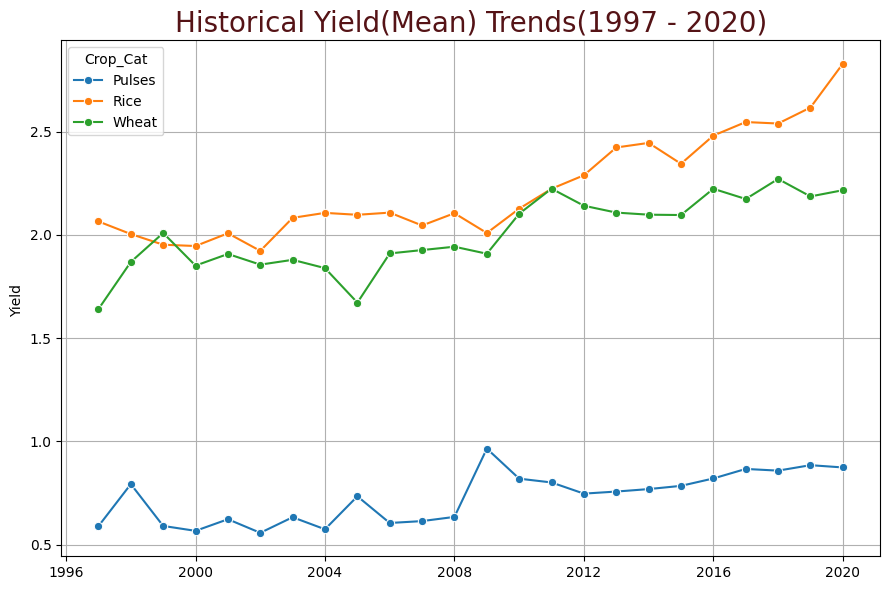

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 6))
sns.lineplot(data=Targeted_crops, x='Crop_Year', y='Yield', hue='Crop_Cat', ci=None, marker='o')


plt.title('Historical Yield(Mean) Trends(1997 - 2020)', fontsize = 20, color = "#551316")
plt.ylabel('Yield ')
plt.xlabel('')
plt.grid(True)
plt.tight_layout()
plt.show()

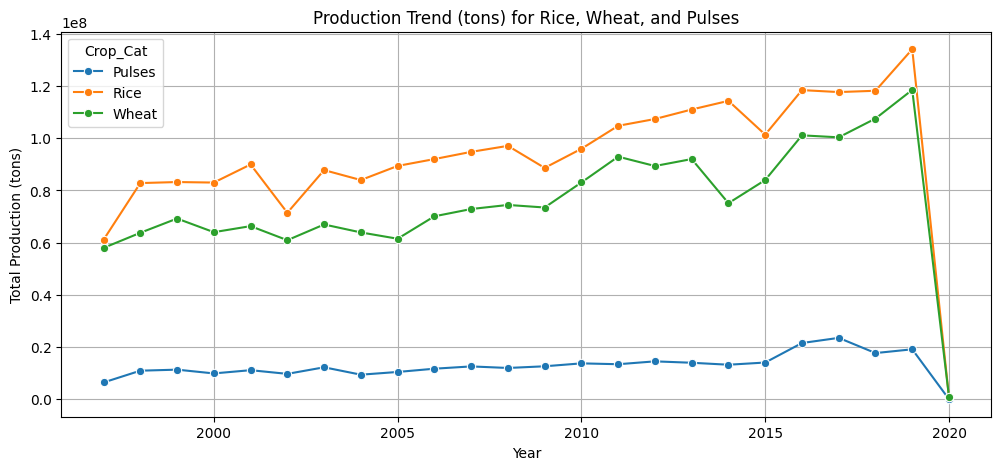

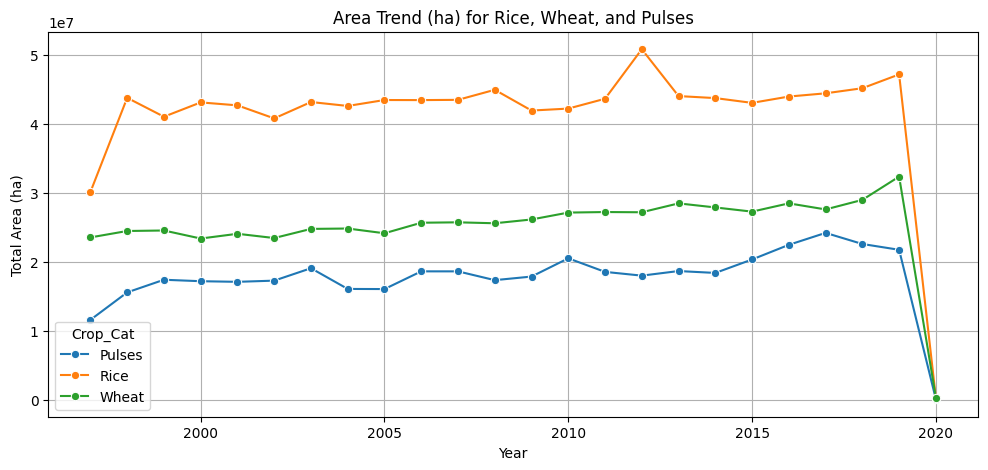

In [29]:

prod_group = crop_yield[crop_yield['Crop_Cat'].isin(['Rice', 'Wheat', 'Pulses'])] \
    .groupby(['Crop_Year', 'Crop_Cat'])['Production'].sum().reset_index()


area_group = crop_yield[crop_yield['Crop_Cat'].isin(['Rice', 'Wheat', 'Pulses'])] \
    .groupby(['Crop_Year', 'Crop_Cat'])['Area'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=prod_group, x='Crop_Year', y='Production', hue='Crop_Cat', marker='o')
plt.title('Production Trend (tons) for Rice, Wheat, and Pulses')
plt.ylabel('Total Production (tons)')
plt.xlabel('Year')
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 5))
sns.lineplot(data=area_group, x='Crop_Year', y='Area', hue='Crop_Cat', marker='o')
plt.title('Area Trend (ha) for Rice, Wheat, and Pulses')
plt.ylabel('Total Area (ha)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

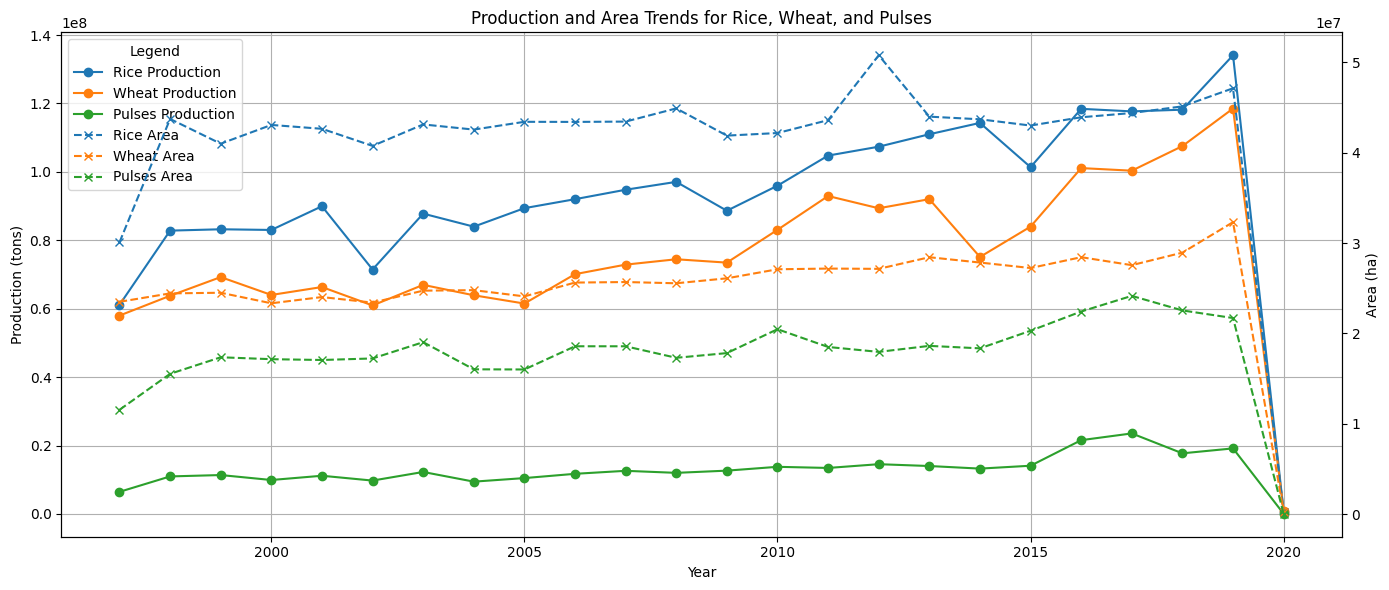

In [30]:
filtered_df = crop_yield[crop_yield['Crop_Cat'].isin(['Rice', 'Wheat', 'Pulses'])]


grouped = filtered_df.groupby(['Crop_Year', 'Crop_Cat'])[['Production', 'Area']].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(14, 6))


colors = {'Rice': 'tab:blue', 'Wheat': 'tab:orange', 'Pulses': 'tab:green'}
for crop in ['Rice', 'Wheat', 'Pulses']:
    data = grouped[grouped['Crop_Cat'] == crop]
    ax1.plot(data['Crop_Year'], data['Production'], label=f'{crop} Production', color=colors[crop], marker='o')

ax1.set_xlabel('Year')
ax1.set_ylabel('Production (tons)', color='black')
ax1.tick_params(axis='y')
ax1.grid(True)


ax2 = ax1.twinx()
for crop in ['Rice', 'Wheat', 'Pulses']:
    data = grouped[grouped['Crop_Cat'] == crop]
    ax2.plot(data['Crop_Year'], data['Area'], label=f'{crop} Area', linestyle='--', color=colors[crop], marker='x')

ax2.set_ylabel('Area (ha)', color='black')
ax2.tick_params(axis='y')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', title='Legend')

plt.title('Production and Area Trends for Rice, Wheat, and Pulses')
plt.tight_layout()
plt.show()

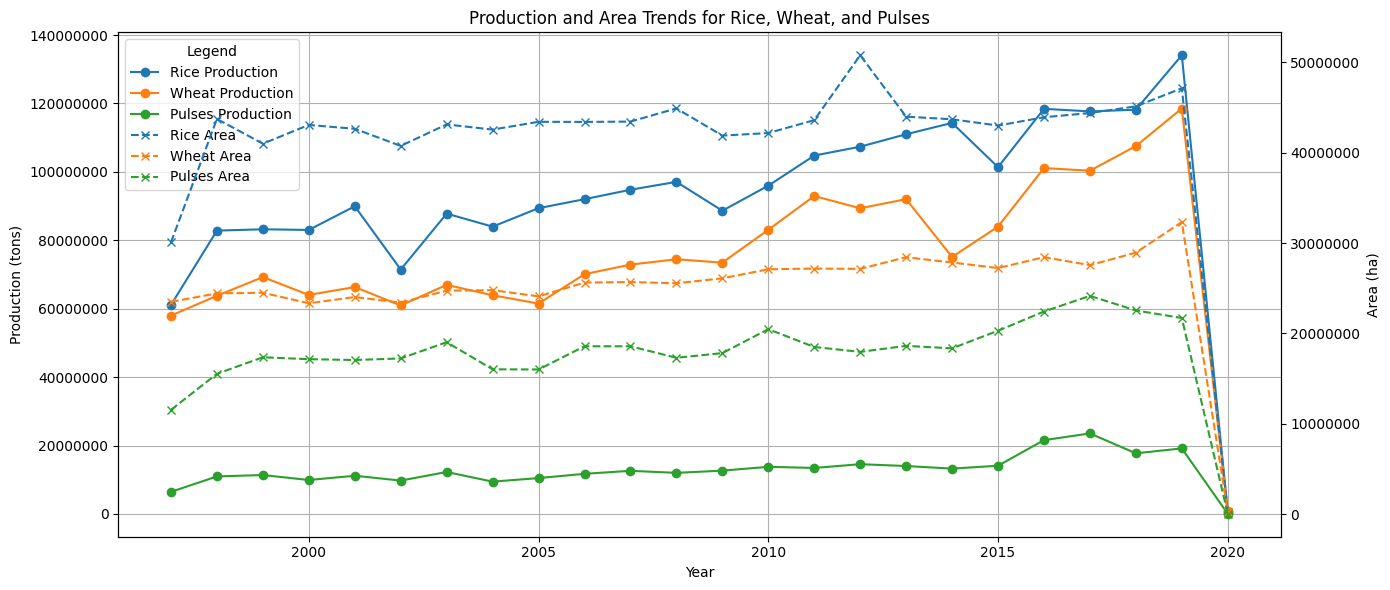

In [31]:
fig, ax1 = plt.subplots(figsize=(14, 6))
colors = {'Rice': 'tab:blue', 'Wheat': 'tab:orange', 'Pulses': 'tab:green'}


for crop in ['Rice', 'Wheat', 'Pulses']:
    data = grouped[grouped['Crop_Cat'] == crop]
    ax1.plot(data['Crop_Year'], data['Production'], label=f'{crop} Production', color=colors[crop], marker='o')

ax1.set_xlabel('Year')
ax1.set_ylabel('Production (tons)', color='black')
ax1.tick_params(axis='y')
ax1.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax1.ticklabel_format(style='plain', axis='y')
ax1.grid(True)


ax2 = ax1.twinx()
for crop in ['Rice', 'Wheat', 'Pulses']:
    data = grouped[grouped['Crop_Cat'] == crop]
    ax2.plot(data['Crop_Year'], data['Area'], label=f'{crop} Area', linestyle='--', color=colors[crop], marker='x')

ax2.set_ylabel('Area (ha)', color='black')
ax2.tick_params(axis='y')
ax2.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax2.ticklabel_format(style='plain', axis='y')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', title='Legend')

plt.title('Production and Area Trends for Rice, Wheat, and Pulses')
plt.tight_layout()
plt.show()

In [32]:
print(grouped[grouped['Crop_Year'] == 2020])

    Crop_Year Crop_Cat  Production      Area
69       2020   Pulses       57292   58092.0
70       2020     Rice      724429  257251.0
71       2020    Wheat      937003  297189.0


###  Label encoding Seasons and Crop_Cat for correlation

In [33]:
print(crop_yield['Yield'].describe())

count    19689.000000
mean        79.954009
std        878.306193
min          0.000000
25%          0.600000
50%          1.030000
75%          2.388889
max      21105.000000
Name: Yield, dtype: float64


In [34]:
crop_yield.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Cat
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,Other
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,Pulses
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,Other
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,Other
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,Other


In [35]:
le = LabelEncoder()
crop_yield['Season_Code'] = le.fit_transform(crop_yield['Season'])
crop_yield['State_Code'] = le.fit_transform(crop_yield['State'])

selected_features = ['Annual_Rainfall', 'Fertilizer', 'Pesticide',  'Production'  ,'Area','State_Code', 'Season_Code' ,  'Yield']

crop_yield['Crop_Cat_Code'] = LabelEncoder().fit_transform(crop_yield['Crop_Cat'])
selected_features.insert(-1, 'Crop_Cat_Code')

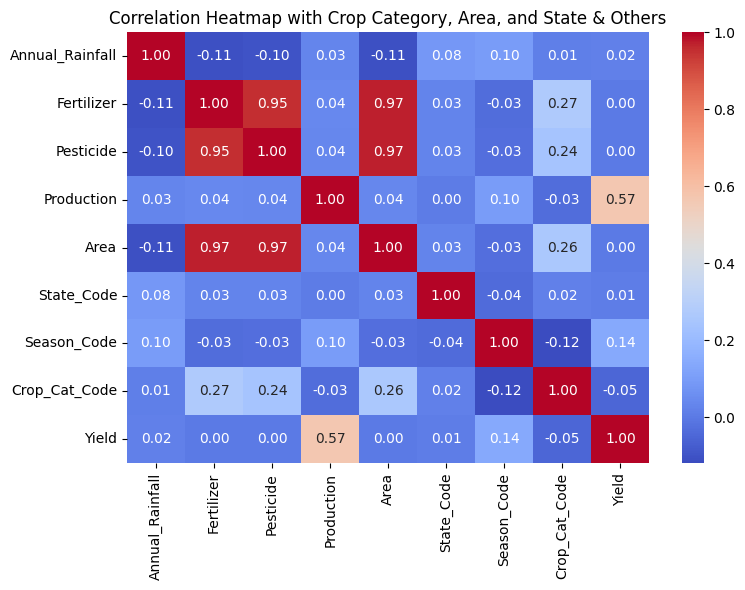

In [36]:
corr = crop_yield[selected_features].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Crop Category, Area, and State & Others')
plt.tight_layout()
plt.show()

In [37]:
crop_yield.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Cat,Season_Code,State_Code,Crop_Cat_Code
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,Other,4,2,0
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,Pulses,1,2,1
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,Other,1,2,0
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,Other,4,2,0
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,Other,1,2,0


In [38]:
df = crop_yield.copy()
Puslses_df = df[df['Crop_Cat'] == 'Pulses']
Puslses_df['Yield'].describe()

count    4246.000000
mean        0.741587
std         1.229422
min         0.000000
25%         0.440374
50%         0.639833
75%         0.874886
max        68.230000
Name: Yield, dtype: float64

In [39]:
Wheat_df = df[df['Crop_Cat'] == 'Wheat']
Wheat_df['Yield'].describe()

count    545.000000
mean       2.005086
std        1.080466
min        0.000000
25%        1.266071
50%        1.668462
75%        2.483000
max        5.068636
Name: Yield, dtype: float64

In [40]:
Rice_df = df[df['Crop_Cat'] == 'Rice']
Rice_df['Yield'].describe()

count    1197.000000
mean        2.218495
std         0.802459
min         0.016667
25%         1.634167
50%         2.203636
75%         2.730000
max         8.778276
Name: Yield, dtype: float64

### There is too high value outliers inside Pulses data whereas Rice and Wheat data do not have that much high Valued Outliers 

In [41]:
df['Crop_Cat'].value_counts()

Crop_Cat
Other     13701
Pulses     4246
Rice       1197
Wheat       545
Name: count, dtype: int64

In [42]:
df = crop_yield.copy()
df = df.rename(columns={'Crop_Year': 'ds'})
df['ds'] = pd.to_datetime(df['ds'], format='%Y')
df = df.sort_values('ds')


In [43]:
df['Fertilizer'] = df['Fertilizer'] / 1000  # kg to tons
df['Pesticide'] = df['Pesticide'] / 1000    # kg to tons


In [44]:
df.head()

,Crop,ds,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Cat,Season_Code,State_Code,Crop_Cat_Code
0,Arecanut,1997-01-01,Whole Year,Assam,73814.0,56708,2051.4,7024.87838,22.88234,0.796087,Other,4,2,0
6211,Banana,1997-01-01,Whole Year,Gujarat,19300.0,1108400,798.9,1836.78100,5.98300,55.276000,Other,4,7,0
6210,Bajra,1997-01-01,Summer,Gujarat,179800.0,380400,798.9,17111.56600,55.73800,2.135000,Other,3,7,0
6209,Bajra,1997-01-01,Kharif,Gujarat,915800.0,1114500,798.9,87156.68600,283.89800,1.218235,Other,1,7,0
6208,Arhar/Tur,1997-01-01,Kharif,Gujarat,395600.0,296200,798.9,37649.25200,122.63600,0.778421,Pulses,1,7,1


### Plotting Separate Yield chart Season Wise for each Crop Category

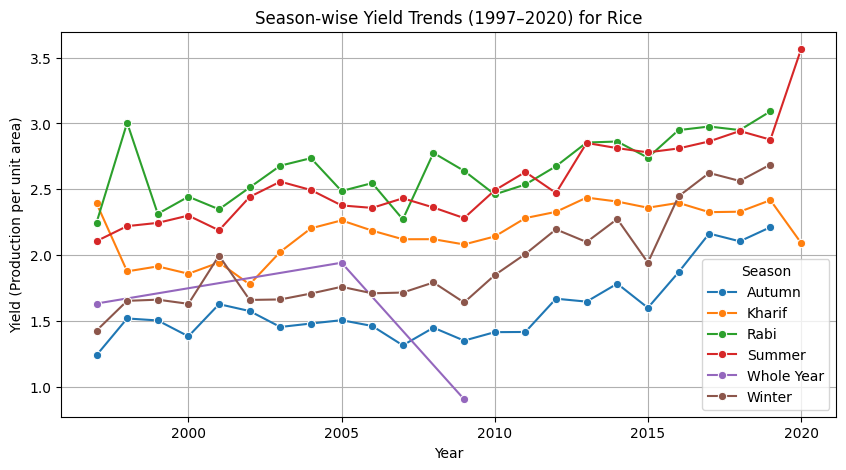

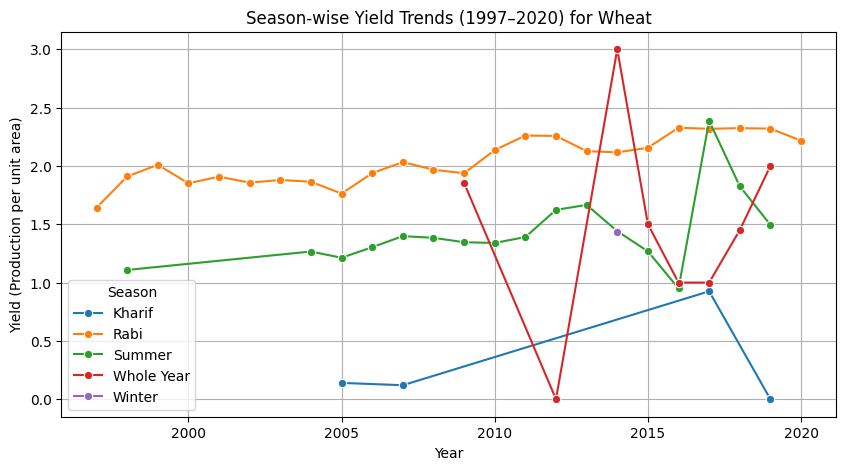

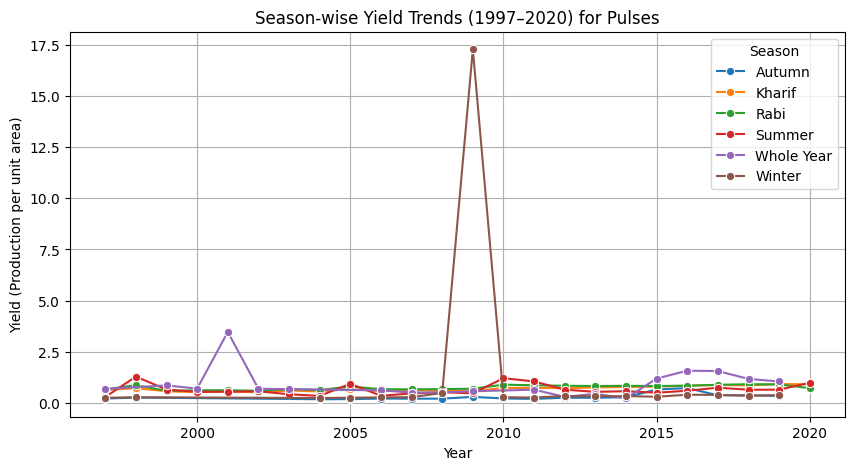

In [45]:

crops_to_analyze = ["Rice", "Wheat", "Pulses"]
df_filtered = df[df['Crop_Cat'].isin(crops_to_analyze)]


df_filtered = df_filtered[(df_filtered['ds'] >= '1997-01-01') & (df_filtered['ds'] <= '2020-12-31')]


df_grouped = (
    df_filtered
    .groupby(['Season', df_filtered['ds'].dt.year, 'Crop_Cat'])['Yield']
    .mean()
    .reset_index()
    .rename(columns={'ds': 'Year'})
)


for crop in crops_to_analyze:
    plt.figure(figsize=(10, 5))
    crop_data = df_grouped[df_grouped['Crop_Cat'] == crop]
    sns.lineplot(data=crop_data, x='Year', y='Yield', hue='Season', marker='o')
    plt.title(f'Season-wise Yield Trends (1997–2020) for {crop}')
    plt.ylabel('Yield (Production per unit area)')
    plt.xlabel('Year')
    plt.legend(title='Season')
    plt.grid(True)
    plt.show()

In [46]:
df['ds'] = df['ds'].dt.year
df.rename(columns={'ds': 'Crop_Year'}, inplace= True)

<Figure size 800x500 with 0 Axes>

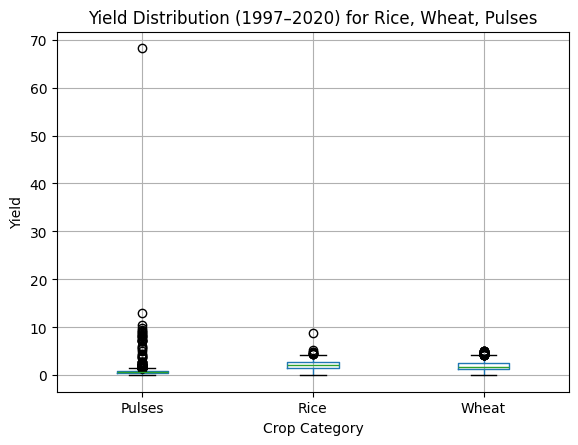

In [47]:
df = df[df['Crop_Cat'].isin(['Rice', 'Wheat', 'Pulses'])]
df = df[(df['Crop_Year'] >= 1997) & (df['Crop_Year'] <= 2020)]


plt.figure(figsize=(8, 5))
df.boxplot(column='Yield', by='Crop_Cat', grid=True)
plt.title("Yield Distribution (1997–2020) for Rice, Wheat, Pulses")
plt.suptitle("")  
plt.xlabel("Crop Category")
plt.ylabel("Yield")
plt.show()

### Sudden_Yield_Drops & Sudden_Yield_Spikes are the columns that can tell us that if there is some extreme level Increment or Decrement in yield due to Policy changes by Indian Government, Floods, Droughts, or some other natural Calamities. 

### Both of them will contain 0 or 1 (True or False), they both should True or 1 so that it can help us predict those extremes for Future.

In [48]:

df = df[df['Crop_Cat'].isin(['Rice', 'Wheat', 'Pulses'])]


df['Sudden_Yield_Spikes'] = 0
df['Sudden_Yield_Drops'] = 0


for crop in ['Rice', 'Wheat', 'Pulses']:
    crop_mask = df['Crop_Cat'] == crop
    
    q1 = df.loc[crop_mask, 'Yield'].quantile(0.25)
    q3 = df.loc[crop_mask, 'Yield'].quantile(0.75)
    iqr = q3 - q1
    
    
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr
    
    
    df.loc[crop_mask & (df['Yield'] > upper_threshold), 'Sudden_Yield_Spikes'] = 1
    df.loc[crop_mask & (df['Yield'] < lower_threshold), 'Sudden_Yield_Drops'] = 1


print("\nSpike counts per crop:")
print(df.groupby('Crop_Cat')['Sudden_Yield_Spikes'].sum())

print("\nDrop counts per crop:")
print(df.groupby('Crop_Cat')['Sudden_Yield_Drops'].sum())


Spike counts per crop:
Crop_Cat
Pulses    119
Rice        9
Wheat      40
Name: Sudden_Yield_Spikes, dtype: int64

Drop counts per crop:
Crop_Cat
Pulses    0
Rice      0
Wheat     0
Name: Sudden_Yield_Drops, dtype: int64


In [49]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Cat,Season_Code,State_Code,Crop_Cat_Code,Sudden_Yield_Spikes,Sudden_Yield_Drops
6208,Arhar/Tur,1997,Kharif,Gujarat,395600.0,296200,798.9,37649.25200,122.63600,0.778421,Pulses,1,7,1,0,0
6207,Wheat,1997,Rabi,Bihar,2067610.0,4048699,1303.7,196774.44370,640.95910,1.811091,Wheat,2,3,3,0,0
6197,Rice,1997,Winter,Bihar,4238204.0,6004120,1303.7,403349.87470,1313.84324,1.354364,Rice,5,3,2,0,0
6196,Rice,1997,Summer,Bihar,124429.0,236446,1303.7,11841.90793,38.57299,1.683265,Rice,3,3,2,0,0
6195,Rice,1997,Autumn,Bihar,749671.0,892725,1303.7,71346.18907,232.39801,1.102245,Rice,0,3,2,0,0


### Removing Sudden_Yield_Drops Column as it doesn't has any values that ca help us determine extreme elvel depressions which might indicate floods, etc.

In [50]:
df = df.drop(columns=['Sudden_Yield_Drops' ])

In [51]:
crop_yield.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Cat,Season_Code,State_Code,Crop_Cat_Code
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,Other,4,2,0
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,Pulses,1,2,1
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,Other,1,2,0
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,Other,4,2,0
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,Other,1,2,0


In [52]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Cat,Season_Code,State_Code,Crop_Cat_Code,Sudden_Yield_Spikes
6208,Arhar/Tur,1997,Kharif,Gujarat,395600.0,296200,798.9,37649.25200,122.63600,0.778421,Pulses,1,7,1,0
6207,Wheat,1997,Rabi,Bihar,2067610.0,4048699,1303.7,196774.44370,640.95910,1.811091,Wheat,2,3,3,0
6197,Rice,1997,Winter,Bihar,4238204.0,6004120,1303.7,403349.87470,1313.84324,1.354364,Rice,5,3,2,0
6196,Rice,1997,Summer,Bihar,124429.0,236446,1303.7,11841.90793,38.57299,1.683265,Rice,3,3,2,0
6195,Rice,1997,Autumn,Bihar,749671.0,892725,1303.7,71346.18907,232.39801,1.102245,Rice,0,3,2,0


In [53]:
selected_features = ['Annual_Rainfall', 'Fertilizer', 'Pesticide',  'Production'  ,'Area','State_Code', 'Season_Code' ,   'Sudden_Yield_Spikes', 'Crop_Cat_Code' , 'Yield']

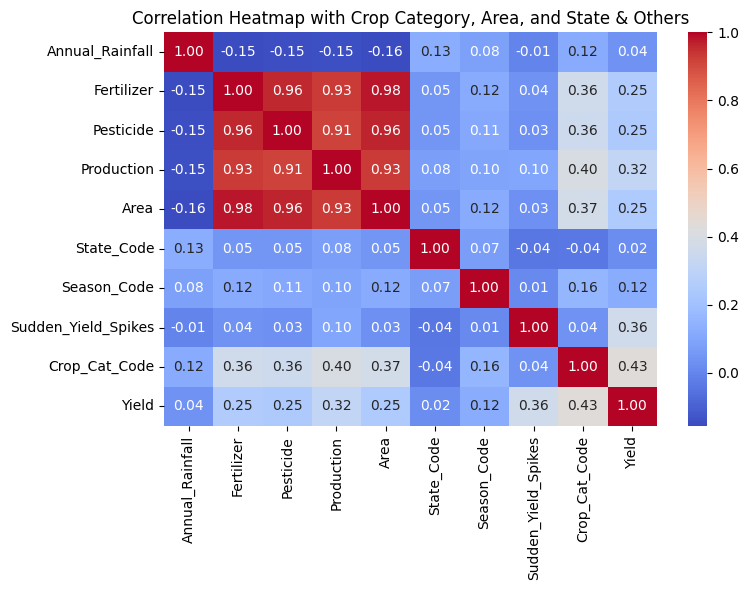

In [54]:
corr = df[selected_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Crop Category, Area, and State & Others')
plt.tight_layout()
plt.show()

In [55]:
selected_features = ['Annual_Rainfall', 'Fertilizer', 'Pesticide',  'Production'  ,'Area','State_Code', 'Season_Code' ,   'Sudden_Yield_Spikes', 'Yield']

### Removed the Crop_Cat_Code for finding Correlation between Features as we're filtering final dataset for 3 Crops  i.e Wheat, Pulses, Rice.


********** Training model for Rice *********


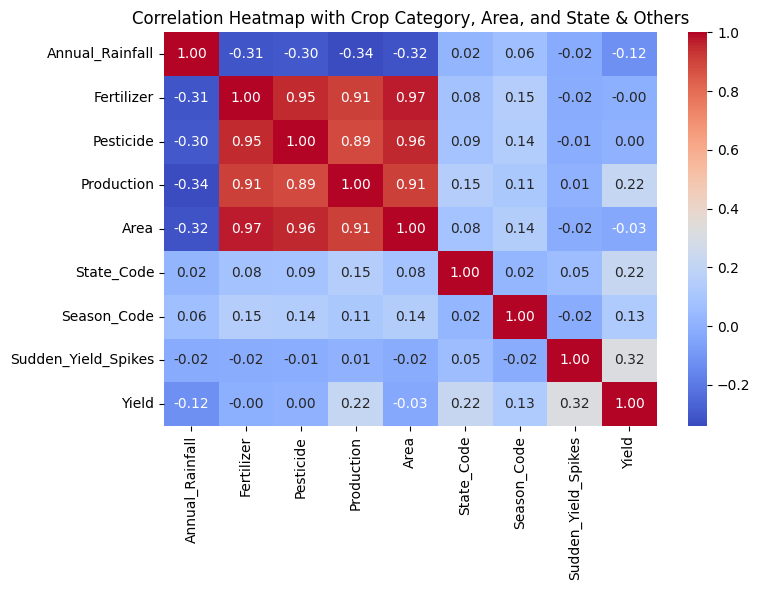


********** Training model for Wheat *********


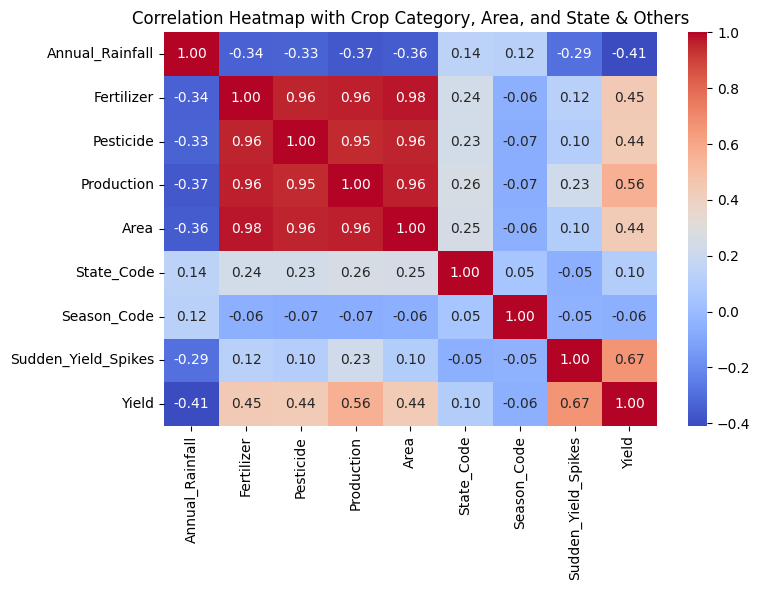


********** Training model for Pulses *********


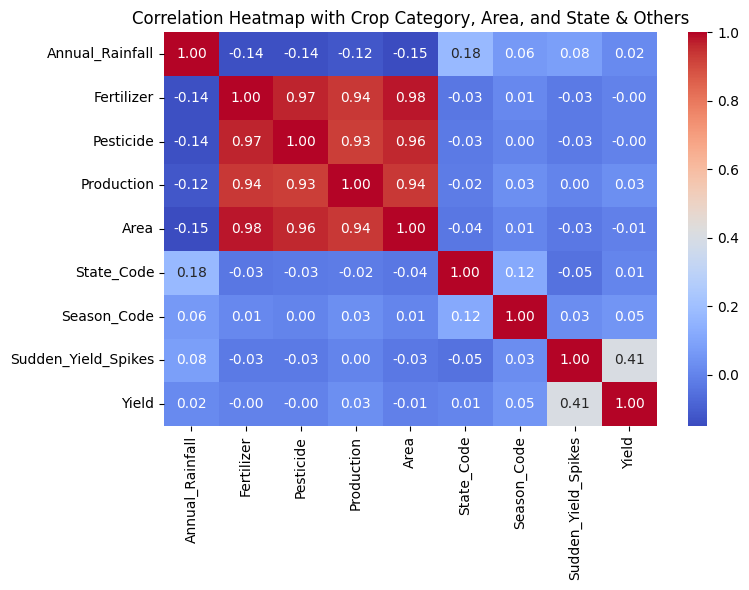

In [56]:
for crop in ['Rice', 'Wheat', 'Pulses']:
    print(f"\n********** Training model for {crop} *********")
    crop_df = df[df['Crop_Cat'] == crop]


    corr = crop_df[selected_features].corr()

    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap with Crop Category, Area, and State & Others')
    plt.tight_layout()
    plt.show()


### All 3 Crops have different Correlations with their Features hence we willl take different features for prediction that will not be same for all.

In [57]:
df['Crop_Cat'].unique()

array(['Pulses', 'Wheat', 'Rice'], dtype=object)

In [58]:
df['ds'] = pd.to_datetime(df['Crop_Year'], format='%Y')


In [59]:
df_final = df.copy()
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Crop_Cat',
       'Season_Code', 'State_Code', 'Crop_Cat_Code', 'Sudden_Yield_Spikes',
       'ds'],
      dtype='object')

In [60]:
df = df.sort_values('Crop_Year')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Cat,Season_Code,State_Code,Crop_Cat_Code,Sudden_Yield_Spikes,ds
6208,Arhar/Tur,1997,Kharif,Gujarat,395600.0,296200,798.9,37649.25200,122.63600,0.778421,Pulses,1,7,1,0,1997-01-01
6207,Wheat,1997,Rabi,Bihar,2067610.0,4048699,1303.7,196774.44370,640.95910,1.811091,Wheat,2,3,3,0,1997-01-01
6197,Rice,1997,Winter,Bihar,4238204.0,6004120,1303.7,403349.87470,1313.84324,1.354364,Rice,5,3,2,0,1997-01-01
6196,Rice,1997,Summer,Bihar,124429.0,236446,1303.7,11841.90793,38.57299,1.683265,Rice,3,3,2,0,1997-01-01
6130,Urad,1997,Summer,Odisha,2077.0,480,1496.6,197.66809,0.64387,0.277826,Pulses,3,20,1,0,1997-01-01


In [61]:
df_final.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Cat,Season_Code,State_Code,Crop_Cat_Code,Sudden_Yield_Spikes,ds
6208,Arhar/Tur,1997,Kharif,Gujarat,395600.0,296200,798.9,37649.25200,122.63600,0.778421,Pulses,1,7,1,0,1997-01-01
6207,Wheat,1997,Rabi,Bihar,2067610.0,4048699,1303.7,196774.44370,640.95910,1.811091,Wheat,2,3,3,0,1997-01-01
6197,Rice,1997,Winter,Bihar,4238204.0,6004120,1303.7,403349.87470,1313.84324,1.354364,Rice,5,3,2,0,1997-01-01
6196,Rice,1997,Summer,Bihar,124429.0,236446,1303.7,11841.90793,38.57299,1.683265,Rice,3,3,2,0,1997-01-01
6195,Rice,1997,Autumn,Bihar,749671.0,892725,1303.7,71346.18907,232.39801,1.102245,Rice,0,3,2,0,1997-01-01


## autocorrelation (ACF) of Yield of Crops

<Figure size 1000x500 with 0 Axes>

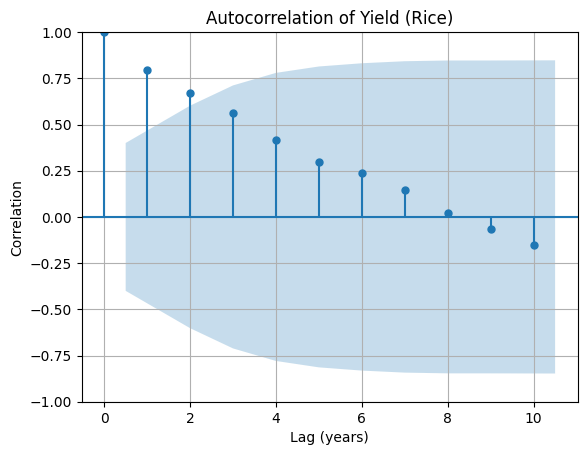

In [62]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt


df_crop = df_final[df_final['Crop_Cat'] == 'Rice'].copy()


df_acf = df_crop.groupby('ds')['Yield'].mean()


plt.figure(figsize=(10, 5))
plot_acf(df_acf, lags=10)  
plt.title("Autocorrelation of Yield (Rice)")
plt.xlabel("Lag (years)")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

<Figure size 1000x500 with 0 Axes>

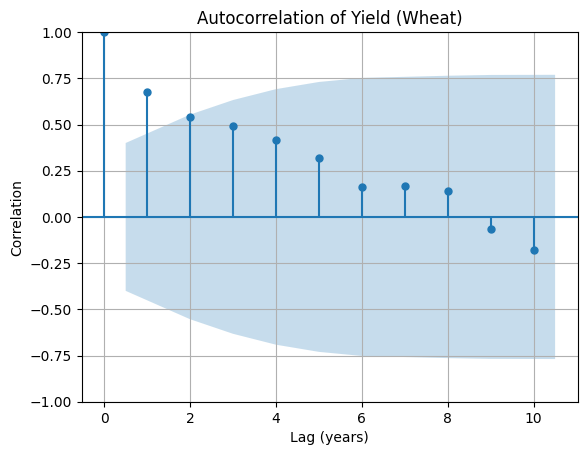

In [63]:
df_crop = df_final[df_final['Crop_Cat'] == 'Wheat'].copy()


df_acf = df_crop.groupby('ds')['Yield'].mean()


plt.figure(figsize=(10, 5))
plot_acf(df_acf, lags=10)  
plt.title("Autocorrelation of Yield (Wheat)")
plt.xlabel("Lag (years)")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt


<Figure size 1000x500 with 0 Axes>

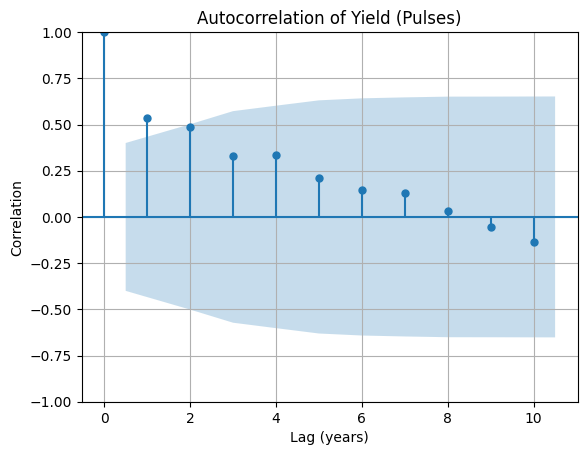

In [64]:
df_crop = df_final[df_final['Crop_Cat'] == 'Pulses'].copy()


df_acf = df_crop.groupby('ds')['Yield'].mean()


plt.figure(figsize=(10, 5))
plot_acf(df_acf, lags=10)  
plt.title("Autocorrelation of Yield (Pulses)")
plt.xlabel("Lag (years)")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

# Feature Engineering
## These features are added one all Rice , Wheat & Pulses  model  for enhancing their learning Rate.

### - Time series often have autocorrelation, where past values influence future values. Lagged features allow the model to learn from these historical patterns.
### - Lagged values give the model information about recent trends and behaviors.


### 1. Year over Year % Yield Change, here it is YoY_Yield_Change.

### 2. Yield Lag 1 and 2, here it is Yield_Lag1(1 year lag) & Yield_Lag2(2 year lag).

### 3. Rolling Mean with window size of 3 and 2, here it is Yield_Roll3 & Yield_Roll2.




In [65]:
Rice_df = df_final[df_final['Crop_Cat'] == 'Rice']

In [66]:
Rice_df['YoY_Yield_Change'] = Rice_df.groupby(['State_Code', 'Season_Code'])['Yield'].pct_change()



Rice_df['YoY_Yield_Change'].replace([np.inf, -np.inf], np.nan, inplace=True)


Rice_df['YoY_Yield_Change'].fillna(Rice_df['YoY_Yield_Change'].mean(), inplace=True)



Rice_df['Yield_Lag1'] = Rice_df.groupby(['State_Code', 'Season_Code'])['Yield'].shift(1)
Rice_df['Yield_Lag2'] = Rice_df.groupby(['State_Code', 'Season_Code'])['Yield'].shift(2)



Rice_df['Yield_Lag1'] = Rice_df['Yield_Lag1'].fillna(Rice_df['Yield_Lag1'].mean())  # or df['Yield'].mean()
Rice_df['Yield_Lag2'] = Rice_df['Yield_Lag2'].fillna(Rice_df['Yield_Lag2'].mean())



Rice_df['Yield_Roll3'] = Rice_df.groupby(['State_Code', 'Season_Code'])['Yield'].transform(lambda x: x.rolling(3, min_periods=1).mean())
Rice_df['Yield_Roll2'] = Rice_df.groupby(['State_Code', 'Season_Code'])['Yield'].transform(lambda x: x.rolling(2, min_periods=1).mean())

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\1561231769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rice_df['YoY_Yield_Change'] = Rice_df.groupby(['State_Code', 'Season_Code'])['Yield'].pct_change()
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\1561231769.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operati

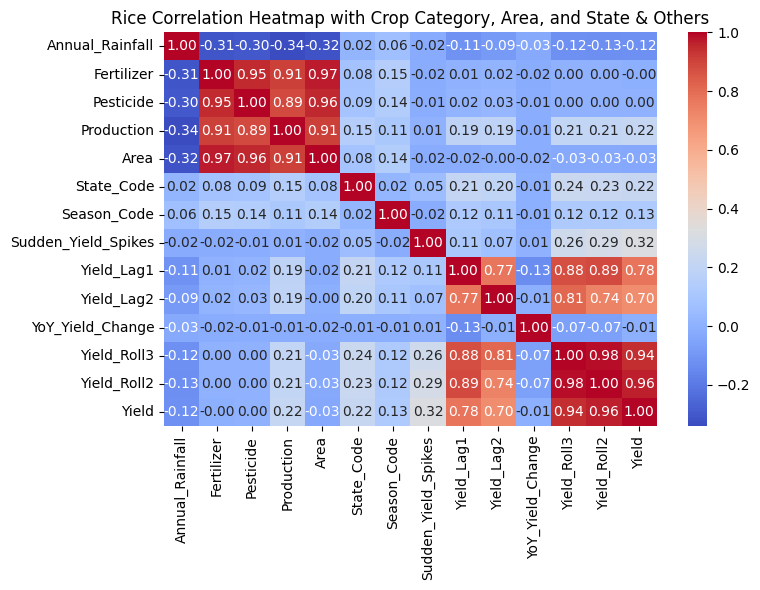

In [67]:
selected_features2 = ['Annual_Rainfall', 'Fertilizer', 'Pesticide',  'Production'  ,'Area','State_Code', 'Season_Code' ,   'Sudden_Yield_Spikes', 'Yield_Lag1',
                       'Yield_Lag2' , 'YoY_Yield_Change', 'Yield_Roll3', 'Yield_Roll2','Yield']
corr = Rice_df[selected_features2].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Rice Correlation Heatmap with Crop Category, Area, and State & Others')
plt.tight_layout()
plt.show()


## Rice
### Climatic Factor

##### Annual Rainfall (-0.12) → Slight negative correlation with yield, suggesting that  rainfall can impact productivity, though not as strongly as in other crops.
##### State (0.22) →  Good Value,  indicating that states do help a lot in Rice Yield mainly due to different variety of their soil. 
##### Season (0.13) → Significant value contributing in improving Yield as seasons also bring different variations in temperature and other effects

### Input Factors

##### Fertilizer Usage (0.00) → Minimal direct correlation.

##### Pesticide Usage (0.00) → Negligible correlation with yields.

##### Cultivated Area (0.22) → Mild positive link, suggesting marginal benefit from expanding cultivation.

### Historical & Policy-Linked Factors

##### Production Volume (0.22) → Positive correlation shows that regions with higher production also maintain better yields.

##### Yield History & Rolling Averages (0.94–0.96) → Very high correlation with past performance, underlining the role of consistent agronomic practices and policy stability over time.

# Predictions for Rice , Wheat & Pulses

### Parameter Tuning has been done for all 3 crops separartely to find best set of hyperparameters that balance accuracy.

In [68]:

def train_prophet_Rice(crop_data, changepoint_prior_scale=0.01, seasonality_prior_scale=10.0):
    crop_data = crop_data.copy()
    crop_data.rename(columns={'Yield': 'y'}, inplace=True)

    modelrice = Prophet(
        yearly_seasonality=True,
        seasonality_prior_scale=seasonality_prior_scale,
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_mode = 'multiplicative'
    )

    
    modelrice.add_regressor('Production')
    modelrice.add_regressor('Season_Code')
    modelrice.add_regressor('State_Code')
    modelrice.add_regressor('Fertilizer')
    modelrice.add_regressor('Pesticide')
    modelrice.add_regressor('Yield_Lag1')
    modelrice.add_regressor('Yield_Lag2')
    modelrice.add_regressor('Sudden_Yield_Spikes')
    modelrice.add_regressor('YoY_Yield_Change')
    modelrice.add_regressor('Yield_Roll3')
    modelrice.add_regressor('Yield_Roll2')
        

    modelrice.fit(crop_data[['ds', 'y',   'Production', 'Season_Code', 'State_Code',  'Fertilizer', 'Pesticide' ,
                              'Yield_Lag1', 'Yield_Lag2',   'Sudden_Yield_Spikes', 'YoY_Yield_Change', 'Yield_Roll3', 'Yield_Roll2']])
    return modelrice


In [69]:
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

def evaluate_model(model, initial='5475 days', period='365 days', horizon='365 days'):
  
    cv_results = cross_validation(model, initial=initial, period=period, horizon=horizon, parallel=  'processes')
    
    
    perf = performance_metrics(cv_results, rolling_window=1)
    
 
    avg_rmse = perf['rmse'].mean() if 'rmse' in perf.columns else np.nan
    
   
    if 'mape' in perf.columns:
        avg_mape = perf['mape'].mean()
    else:
        
        mask = cv_results['y'].abs() > 1e-6  
        avg_mape = mean_absolute_percentage_error(cv_results['y'][mask], cv_results['yhat'][mask])
    
    return float(avg_mape)*100, float(avg_rmse)




modelrice = train_prophet_Rice(Rice_df)

avg_mape, avg_rmse = evaluate_model(modelrice)
print(f"Rice - Avg MAPE: {avg_mape:.4f}, Avg RMSE: {avg_rmse:.4f}")

18:10:56 - cmdstanpy - INFO - Chain [1] start processing
18:10:56 - cmdstanpy - INFO - Chain [1] done processing


Rice - Avg MAPE: 2.7970, Avg RMSE: 0.1158


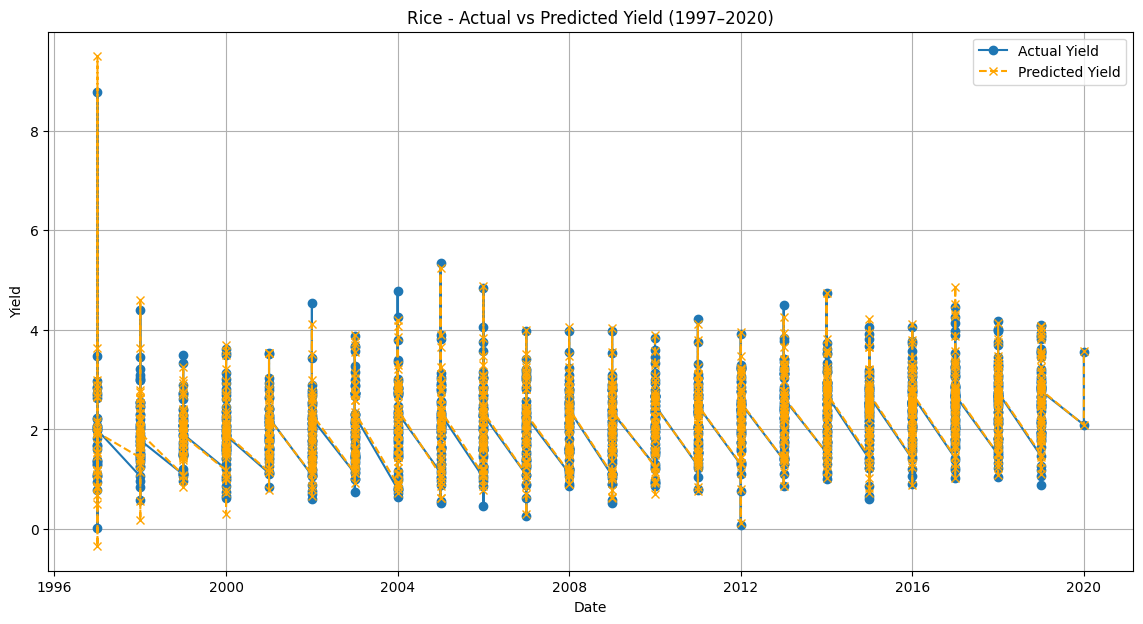

In [70]:
def plot_actual_vs_predicted_points(modelrice, df_crop, title):
    
    df_sorted = df_crop.sort_values(['Crop_Year', 'Season_Code', 'State_Code']).reset_index(drop=True)

    
    cols_for_pred = ['ds'] + list(modelrice.extra_regressors.keys())
    forecast = modelrice.predict(df_sorted[cols_for_pred])

    
    df_sorted['Predicted'] = forecast['yhat'].values

    
    plt.figure(figsize=(14, 7))
    plt.plot(df_sorted['ds'], df_sorted['y'], label='Actual Yield', marker='o', linestyle='-')
    plt.plot(df_sorted['ds'], df_sorted['Predicted'], label='Predicted Yield', marker='x', linestyle='--', color='orange')
    plt.title(f"{title} - Actual vs Predicted Yield (1997–2020)")
    plt.xlabel("Date")
    plt.ylabel("Yield")
    plt.legend()
    plt.grid(True)
    plt.show()


Rice_df_prophet = Rice_df.rename(columns={'Yield': 'y'})
plot_actual_vs_predicted_points(modelrice, Rice_df_prophet, "Rice")

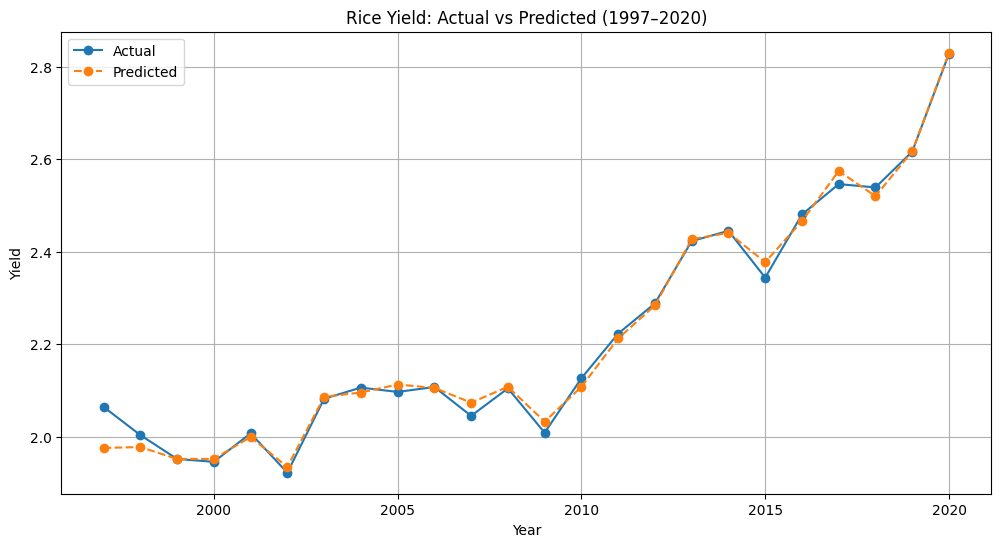

In [71]:
import matplotlib.pyplot as plt

def plot_wheat_actual_vs_predicted(modelrice, Rice_df):
    
    Rice_df_sorted = Rice_df.sort_values(['Crop_Year', 'Season_Code', 'State_Code']).reset_index(drop=True)

    
    cols_for_pred = ['ds'] + list(modelrice.extra_regressors.keys())
    forecast = modelrice.predict(Rice_df_sorted[cols_for_pred])

   
    Rice_df_sorted['Predicted'] = forecast['yhat'].values

    
    df_plot = (
        Rice_df_sorted.groupby(['Crop_Year'], as_index=False)[['Yield', 'Predicted']]
        .mean()
    )

    
    plt.figure(figsize=(12, 6))
    plt.plot(df_plot['Crop_Year'], df_plot['Yield'], marker='o', label='Actual')
    plt.plot(df_plot['Crop_Year'], df_plot['Predicted'], marker='o', label='Predicted', linestyle='--')
    plt.title("Rice Yield: Actual vs Predicted (1997–2020)")
    plt.xlabel("Year")
    plt.ylabel("Yield")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_wheat_actual_vs_predicted(modelrice, Rice_df)

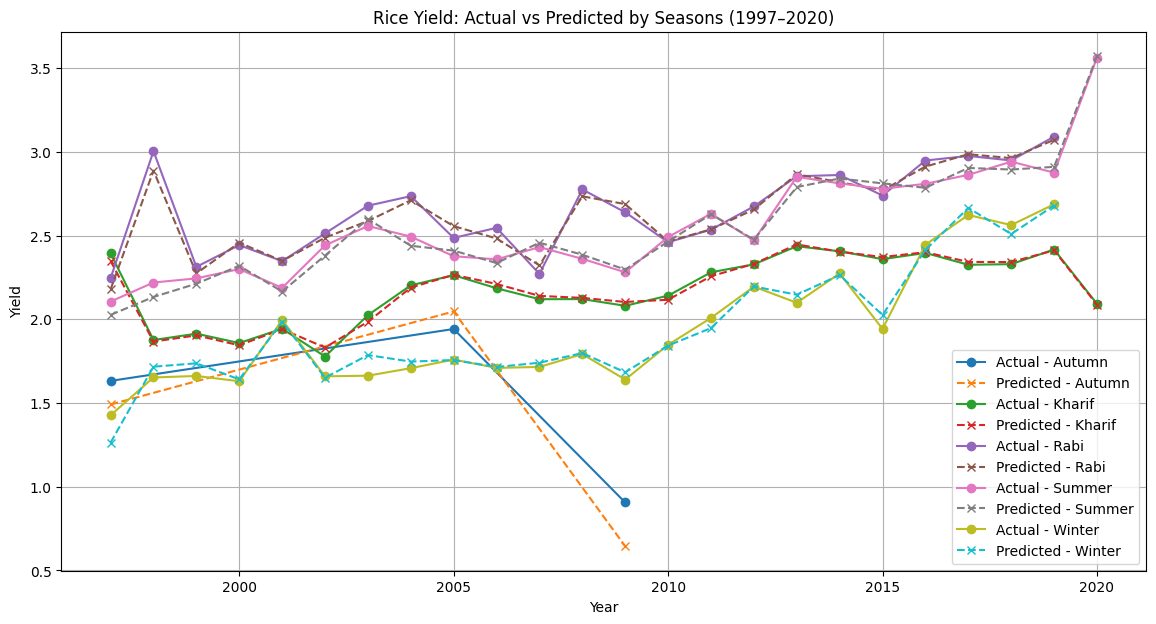

In [72]:
def plot_wheat_actual_vs_predicted_seasonwise(modelrice, Rice_df):
    
    Rice_df_sorted = Rice_df.sort_values(['Crop_Year', 'Season_Code', 'State_Code']).reset_index(drop=True)

   
    cols_for_pred = ['ds'] + list(modelrice.extra_regressors.keys())
    forecast = modelrice.predict(Rice_df_sorted[cols_for_pred])

    
    Rice_df_sorted['Predicted'] = forecast['yhat'].values

    
    season_map = {
        1: "Kharif",
        2: "Rabi",
        3: "Summer",
        4: "Autumn",
        5: "Winter",
        6: "Whole Year"
    }
    Rice_df_sorted['Season'] = Rice_df_sorted['Season_Code'].map(season_map)

    
    df_plot = (
        Rice_df_sorted.groupby(['Crop_Year', 'Season'], as_index=False)[['Yield', 'Predicted']]
        .mean()
    )

    
    plt.figure(figsize=(14, 7))
    for season in df_plot['Season'].unique():
        season_data = df_plot[df_plot['Season'] == season]
        plt.plot(season_data['Crop_Year'], season_data['Yield'], marker='o', label=f'Actual - {season}')
        plt.plot(season_data['Crop_Year'], season_data['Predicted'], marker='x', linestyle='--', label=f'Predicted - {season}')

    plt.title("Rice Yield: Actual vs Predicted by Seasons (1997–2020)")
    plt.xlabel("Year")
    plt.ylabel("Yield")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_wheat_actual_vs_predicted_seasonwise(modelrice, Rice_df)

In [73]:
Wheat_df = df_final[df_final['Crop_Cat'] == 'Wheat']

In [74]:
Wheat_df['YoY_Yield_Change'] = Wheat_df.groupby(['State_Code', 'Season_Code'])['Yield'].pct_change()



Wheat_df['YoY_Yield_Change'].replace([np.inf, -np.inf], np.nan, inplace=True)


Wheat_df['YoY_Yield_Change'].fillna(Wheat_df['YoY_Yield_Change'].mean(), inplace=True)



Wheat_df['Yield_Lag1'] = Wheat_df.groupby(['State_Code', 'Season_Code'])['Yield'].shift(1)
Wheat_df['Yield_Lag2'] = Wheat_df.groupby(['State_Code', 'Season_Code'])['Yield'].shift(2)



Wheat_df['Yield_Lag1'] = Wheat_df['Yield_Lag1'].fillna(Wheat_df['Yield_Lag1'].mean())  
Wheat_df['Yield_Lag2'] = Wheat_df['Yield_Lag2'].fillna(Wheat_df['Yield_Lag2'].mean())



Wheat_df['YoY_Yield_Change'] = Wheat_df['YoY_Yield_Change'].fillna(Wheat_df['YoY_Yield_Change'].mean())


Wheat_df['Yield_Roll3'] = Wheat_df.groupby(['State_Code', 'Season_Code'])['Yield'].transform(lambda x: x.rolling(3, min_periods=1).mean())
Wheat_df['Yield_Roll2'] = Wheat_df.groupby(['State_Code', 'Season_Code'])['Yield'].transform(lambda x: x.rolling(2, min_periods=1).mean())


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\2637432698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wheat_df['YoY_Yield_Change'] = Wheat_df.groupby(['State_Code', 'Season_Code'])['Yield'].pct_change()
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\2637432698.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the opera

In [75]:
Wheat_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,...,Season_Code,State_Code,Crop_Cat_Code,Sudden_Yield_Spikes,ds,YoY_Yield_Change,Yield_Lag1,Yield_Lag2,Yield_Roll3,Yield_Roll2
6207,Wheat,1997,Rabi,Bihar,2067610.0,4048699,1303.7,196774.44370,640.95910,1.811091,...,2,3,3,0,1997-01-01,0.058361,2.005333,2.000835,1.811091,1.811091
6237,Wheat,1997,Rabi,Gujarat,694000.0,1647100,798.9,66047.98000,215.14000,2.360000,...,2,7,3,0,1997-01-01,0.058361,2.005333,2.000835,2.360000,2.360000
6132,Wheat,1997,Rabi,Odisha,5162.0,6360,1496.6,491.26754,1.60022,0.856667,...,2,20,3,0,1997-01-01,0.058361,2.005333,2.000835,0.856667,0.856667
6168,Wheat,1997,Rabi,Andhra Pradesh,11000.0,6000,927.5,1046.87000,3.41000,0.553750,...,2,0,3,0,1997-01-01,0.058361,2.005333,2.000835,0.553750,0.553750
17363,Wheat,1997,Rabi,Haryana,2057000.0,7528000,661.2,195764.69000,637.67000,3.607368,...,2,8,3,0,1997-01-01,0.058361,2.005333,2.000835,3.607368,3.607368


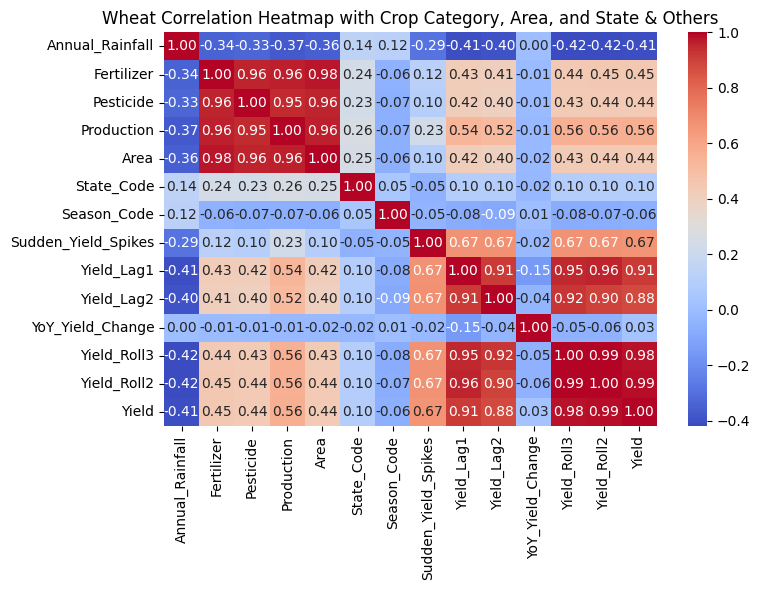

In [76]:
selected_features1 = ['Annual_Rainfall', 'Fertilizer', 'Pesticide',  'Production'  ,'Area','State_Code', 'Season_Code' ,   'Sudden_Yield_Spikes', 'Yield_Lag1',
                       'Yield_Lag2' , 'YoY_Yield_Change', 'Yield_Roll3', 'Yield_Roll2','Yield']
corr = Wheat_df[selected_features1].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Wheat Correlation Heatmap with Crop Category, Area, and State & Others')
plt.tight_layout()
plt.show()


## Wheat
### Climatic Factor

##### Annual Rainfall (-0.41) →  rainfall shows a strong negative correlation with yield, indicating possible adverse effects  floods, or disease spread.
##### State (0.10) →    It indicates that states do help a  in Wheat Yield mainly due to different variety of their soil. 
##### Season (-0.16) → Neagtive value contributing in impacting Yield as seasons also bring different variations in temperature and other effects.


### Input Factors

##### Fertilizer Usage (0.45) → Higher fertilizer application is moderately associated with better yields.

##### Pesticide Usage (0.44) → Adequate pest control contributes positively to yield stability.

##### Cultivated Area (0.44) → Larger cultivation area is linked with higher yields.



### Historical & Policy-Linked Factors

##### Production Volume (0.56) → Strong positive link suggests that policies promoting efficient production methods directly support yield growth.

##### Yield History & Rolling Averages (>0.9) → High correlation with past yield patterns highlights the importance of consistent agronomic practices and long term planning.

In [77]:
Wheat_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,...,Season_Code,State_Code,Crop_Cat_Code,Sudden_Yield_Spikes,ds,YoY_Yield_Change,Yield_Lag1,Yield_Lag2,Yield_Roll3,Yield_Roll2
6207,Wheat,1997,Rabi,Bihar,2067610.0,4048699,1303.7,196774.44370,640.95910,1.811091,...,2,3,3,0,1997-01-01,0.058361,2.005333,2.000835,1.811091,1.811091
6237,Wheat,1997,Rabi,Gujarat,694000.0,1647100,798.9,66047.98000,215.14000,2.360000,...,2,7,3,0,1997-01-01,0.058361,2.005333,2.000835,2.360000,2.360000
6132,Wheat,1997,Rabi,Odisha,5162.0,6360,1496.6,491.26754,1.60022,0.856667,...,2,20,3,0,1997-01-01,0.058361,2.005333,2.000835,0.856667,0.856667
6168,Wheat,1997,Rabi,Andhra Pradesh,11000.0,6000,927.5,1046.87000,3.41000,0.553750,...,2,0,3,0,1997-01-01,0.058361,2.005333,2.000835,0.553750,0.553750
17363,Wheat,1997,Rabi,Haryana,2057000.0,7528000,661.2,195764.69000,637.67000,3.607368,...,2,8,3,0,1997-01-01,0.058361,2.005333,2.000835,3.607368,3.607368


In [78]:
Wheat_df.isnull().sum()

Crop                   0
Crop_Year              0
Season                 0
State                  0
Area                   0
Production             0
Annual_Rainfall        0
Fertilizer             0
Pesticide              0
Yield                  0
Crop_Cat               0
Season_Code            0
State_Code             0
Crop_Cat_Code          0
Sudden_Yield_Spikes    0
ds                     0
YoY_Yield_Change       0
Yield_Lag1             0
Yield_Lag2             0
Yield_Roll3            0
Yield_Roll2            0
dtype: int64

In [79]:


def train_prophet_Wheat(crop_data, changepoint_prior_scale=0.01, seasonality_prior_scale=5.0):
    crop_data = crop_data.copy()
    crop_data.rename(columns={'Yield': 'y'}, inplace=True)

    modelwheat = Prophet(
        yearly_seasonality=True,
        seasonality_prior_scale=seasonality_prior_scale,
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_mode = 'multiplicative'
    )


    
    
        
    modelwheat.add_regressor('Area')
    modelwheat.add_regressor('Production')
    modelwheat.add_regressor('Season_Code')
    modelwheat.add_regressor('State_Code')
    modelwheat.add_regressor('Fertilizer')
    modelwheat.add_regressor('Pesticide')
    modelwheat.add_regressor('Yield_Lag1')
    modelwheat.add_regressor('Yield_Lag2')
    modelwheat.add_regressor('Sudden_Yield_Spikes')
    modelwheat.add_regressor('YoY_Yield_Change')
    modelwheat.add_regressor('Yield_Roll3')
    modelwheat.add_regressor('Yield_Roll2')
        

    modelwheat.fit(crop_data[['ds', 'y',  'Area', 'Production', 'Season_Code', 'State_Code',  'Fertilizer', 'Pesticide' ,
                              'Yield_Lag1', 'Yield_Lag2',   'Sudden_Yield_Spikes', 'YoY_Yield_Change', 'Yield_Roll3', 'Yield_Roll2']])
    return modelwheat
        

In [80]:
def evaluate_model(model, initial='5475 days', period='365 days', horizon='730 days'):
    
    cv_results = cross_validation(model, initial=initial, period=period, horizon=horizon, parallel=  'processes')
    
    
    perf = performance_metrics(cv_results, rolling_window=1)
    
    
    avg_rmse = perf['rmse'].mean() if 'rmse' in perf.columns else np.nan
    
    
    if 'mape' in perf.columns:
        avg_mape = perf['mape'].mean()
    else:
        
        mask = cv_results['y'].abs() > 1e-6  
        avg_mape = mean_absolute_percentage_error(cv_results['y'][mask], cv_results['yhat'][mask])
    
    return float(avg_mape)*100, float(avg_rmse)



modelwheat = train_prophet_Wheat(Wheat_df)

avg_mape, avg_rmse = evaluate_model(modelwheat)
print(f"Wheat - Avg MAPE: {avg_mape:.4f}, Avg RMSE: {avg_rmse:.4f}")

18:11:00 - cmdstanpy - INFO - Chain [1] start processing
18:11:00 - cmdstanpy - INFO - Chain [1] done processing


Wheat - Avg MAPE: 5.6957, Avg RMSE: 0.1558


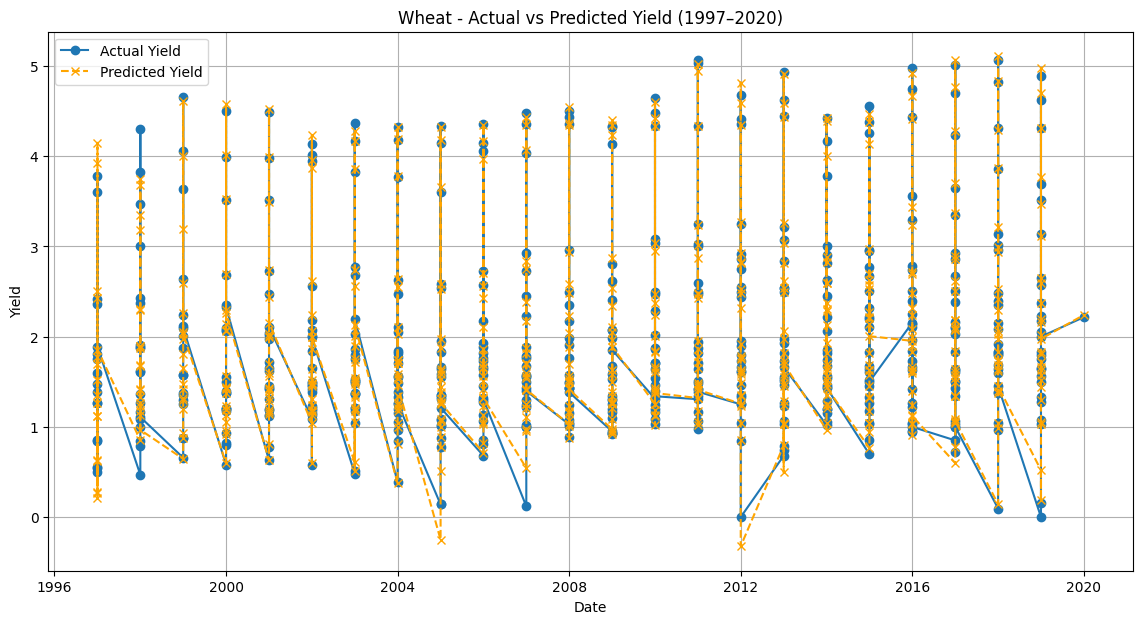

In [81]:
def plot_actual_vs_predicted_points(modelwheat, df_crop, title):
   
    df_sorted = df_crop.sort_values(['Crop_Year', 'Season_Code', 'State_Code']).reset_index(drop=True)

    
    cols_for_pred = ['ds'] + list(modelwheat.extra_regressors.keys())
    forecast = modelwheat.predict(df_sorted[cols_for_pred])

    
    df_sorted['Predicted'] = forecast['yhat'].values

    
    plt.figure(figsize=(14, 7))
    plt.plot(df_sorted['ds'], df_sorted['y'], label='Actual Yield', marker='o', linestyle='-')
    plt.plot(df_sorted['ds'], df_sorted['Predicted'], label='Predicted Yield', marker='x', linestyle='--', color='orange')
    plt.title(f"{title} - Actual vs Predicted Yield (1997–2020)")
    plt.xlabel("Date")
    plt.ylabel("Yield")
    plt.legend()
    plt.grid(True)
    plt.show()


Wheat_df_prophet = Wheat_df.rename(columns={'Yield': 'y'})
plot_actual_vs_predicted_points(modelwheat, Wheat_df_prophet, "Wheat")

In [82]:
list(modelwheat.extra_regressors.keys())

['Area',
 'Production',
 'Season_Code',
 'State_Code',
 'Fertilizer',
 'Pesticide',
 'Yield_Lag1',
 'Yield_Lag2',
 'Sudden_Yield_Spikes',
 'YoY_Yield_Change',
 'Yield_Roll3',
 'Yield_Roll2']

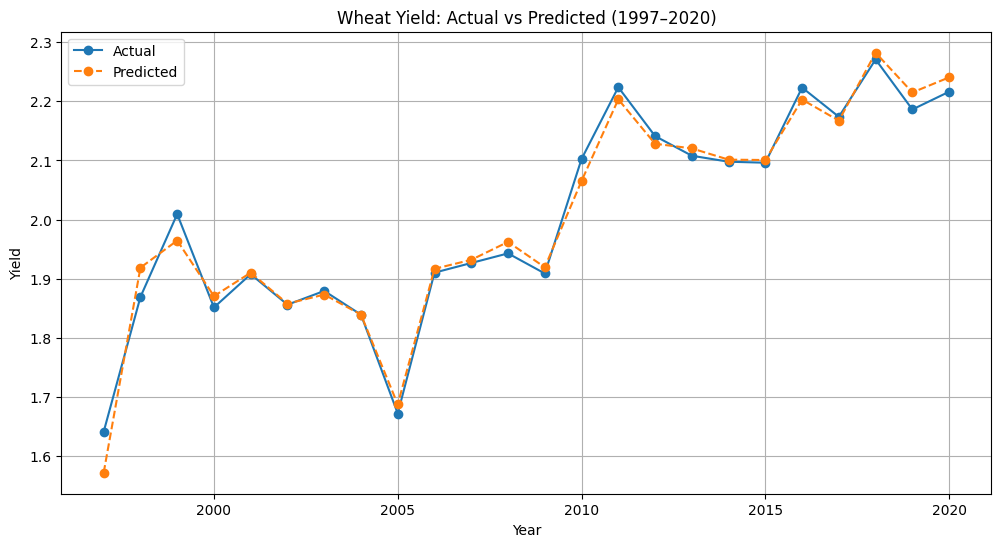

In [83]:
import matplotlib.pyplot as plt

def plot_wheat_actual_vs_predicted(modelwheat, wheat_df):
    
    wheat_df_sorted = wheat_df.sort_values(['Crop_Year', 'Season_Code', 'State_Code']).reset_index(drop=True)

    
    cols_for_pred = ['ds'] + list(modelwheat.extra_regressors.keys())
    forecast = modelwheat.predict(wheat_df_sorted[cols_for_pred])

   
    wheat_df_sorted['Predicted'] = forecast['yhat'].values

    
    df_plot = (
        wheat_df_sorted.groupby(['Crop_Year'], as_index=False)[['Yield', 'Predicted']]
        .mean()
    )

    
    plt.figure(figsize=(12, 6))
    plt.plot(df_plot['Crop_Year'], df_plot['Yield'], marker='o', label='Actual')
    plt.plot(df_plot['Crop_Year'], df_plot['Predicted'], marker='o', label='Predicted', linestyle='--')
    plt.title("Wheat Yield: Actual vs Predicted (1997–2020)")
    plt.xlabel("Year")
    plt.ylabel("Yield")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_wheat_actual_vs_predicted(modelwheat, Wheat_df)

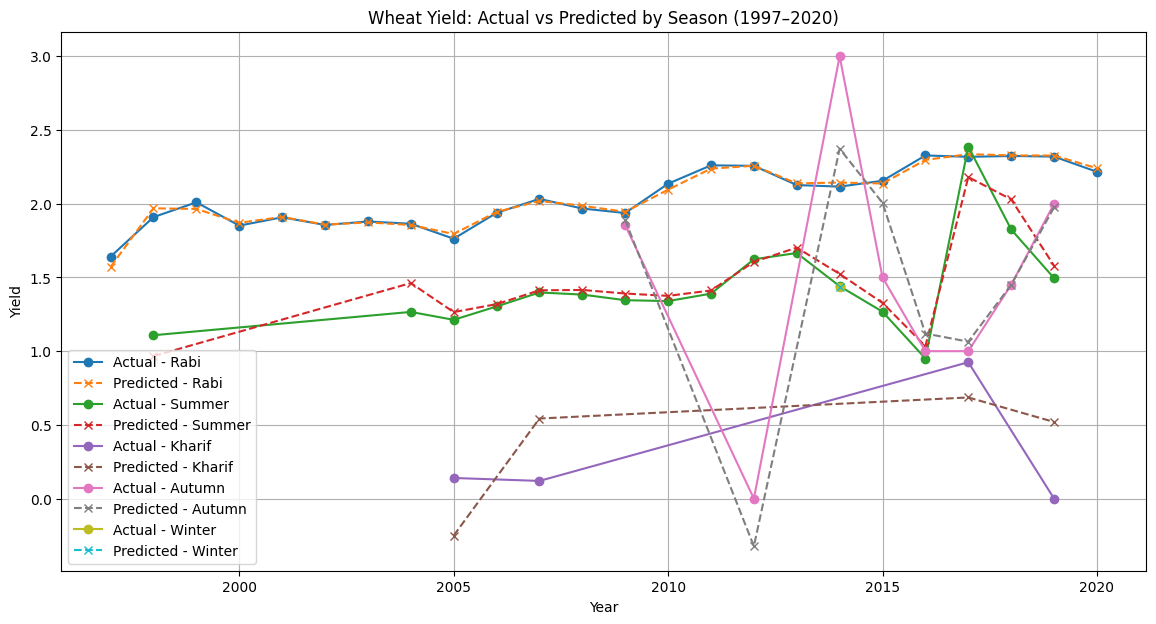

In [84]:
def plot_wheat_actual_vs_predicted_seasonwise(modelwheat, wheat_df):
    
    wheat_df_sorted = wheat_df.sort_values(['Crop_Year', 'Season_Code', 'State_Code']).reset_index(drop=True)

    
    cols_for_pred = ['ds'] + list(modelwheat.extra_regressors.keys())
    forecast = modelwheat.predict(wheat_df_sorted[cols_for_pred])

    
    wheat_df_sorted['Predicted'] = forecast['yhat'].values

    
    season_map = {
        1: "Kharif",
        2: "Rabi",
        3: "Summer",
        4: "Autumn",
        5: "Winter",
        6: "Whole Year"
    }
    wheat_df_sorted['Season'] = wheat_df_sorted['Season_Code'].map(season_map)

    
    df_plot = (
        wheat_df_sorted.groupby(['Crop_Year', 'Season'], as_index=False)[['Yield', 'Predicted']]
        .mean()
    )

    
    plt.figure(figsize=(14, 7))
    for season in df_plot['Season'].unique():
        season_data = df_plot[df_plot['Season'] == season]
        plt.plot(season_data['Crop_Year'], season_data['Yield'], marker='o', label=f'Actual - {season}')
        plt.plot(season_data['Crop_Year'], season_data['Predicted'], marker='x', linestyle='--', label=f'Predicted - {season}')

    plt.title("Wheat Yield: Actual vs Predicted by Season (1997–2020)")
    plt.xlabel("Year")
    plt.ylabel("Yield")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_wheat_actual_vs_predicted_seasonwise(modelwheat, Wheat_df)

In [85]:
Pulses_df = df_final[df_final['Crop_Cat'] == 'Pulses']

Pulses_df['Yield_Lag1'] = Pulses_df.groupby(['State_Code', 'Season_Code'])['Yield'].shift(1)
Pulses_df['Yield_Lag2'] = Pulses_df.groupby(['State_Code', 'Season_Code'])['Yield'].shift(2)

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\4232295115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pulses_df['Yield_Lag1'] = Pulses_df.groupby(['State_Code', 'Season_Code'])['Yield'].shift(1)
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\4232295115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pulses_df['Yield_Lag2'] = Pulses_df.groupby(['State_Code', 'Season_Code'])['Yield'].shift(2)


In [86]:
Pulses_df['YoY_Yield_Change'] = Pulses_df.groupby(['State_Code', 'Season_Code'])['Yield'].pct_change()



Pulses_df['YoY_Yield_Change'].replace([np.inf, -np.inf], np.nan, inplace=True)

Pulses_df['YoY_Yield_Change'].fillna(Pulses_df['YoY_Yield_Change'].mean(), inplace=True)

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\2730322495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pulses_df['YoY_Yield_Change'] = Pulses_df.groupby(['State_Code', 'Season_Code'])['Yield'].pct_change()
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\2730322495.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the ope

In [87]:
Pulses_df['Yield_Lag1'] = Pulses_df['Yield_Lag1'].fillna(Pulses_df['Yield_Lag1'].mean()) 
Pulses_df['Yield_Lag2'] = Pulses_df['Yield_Lag2'].fillna(Pulses_df['Yield_Lag2'].mean())

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\743856223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pulses_df['Yield_Lag1'] = Pulses_df['Yield_Lag1'].fillna(Pulses_df['Yield_Lag1'].mean())
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\743856223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pulses_df['Yield_Lag2'] = Pulses_df['Yield_Lag2'].fillna(Pulses_df['Yield_Lag2'].mean())


In [88]:
Pulses_df['YoY_Yield_Change'] = Pulses_df['YoY_Yield_Change'].fillna(Pulses_df['YoY_Yield_Change'].mean())

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\2752106024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pulses_df['YoY_Yield_Change'] = Pulses_df['YoY_Yield_Change'].fillna(Pulses_df['YoY_Yield_Change'].mean())


In [89]:
Pulses_df['YoY_Yield_Change'].describe()

count    4246.000000
mean        0.263990
std         2.148678
min        -1.000000
25%        -0.211509
50%         0.008157
75%         0.281909
max        61.888727
Name: YoY_Yield_Change, dtype: float64

In [90]:
Pulses_df['Yield_Roll3'] = Pulses_df.groupby(['State_Code', 'Season_Code'])['Yield'].transform(lambda x: x.rolling(3, min_periods=1).mean())

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\946622185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pulses_df['Yield_Roll3'] = Pulses_df.groupby(['State_Code', 'Season_Code'])['Yield'].transform(lambda x: x.rolling(3, min_periods=1).mean())


In [91]:
Pulses_df['Yield_Roll2'] = Pulses_df.groupby(['State_Code', 'Season_Code'])['Yield'].transform(lambda x: x.rolling(2, min_periods=1).mean())

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_15996\3960561525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pulses_df['Yield_Roll2'] = Pulses_df.groupby(['State_Code', 'Season_Code'])['Yield'].transform(lambda x: x.rolling(2, min_periods=1).mean())


In [92]:
Pulses_df['Yield_Roll2'].describe()

count    4246.000000
mean        0.732406
std         0.738277
min         0.000000
25%         0.469853
50%         0.653678
75%         0.865743
max        34.681000
Name: Yield_Roll2, dtype: float64

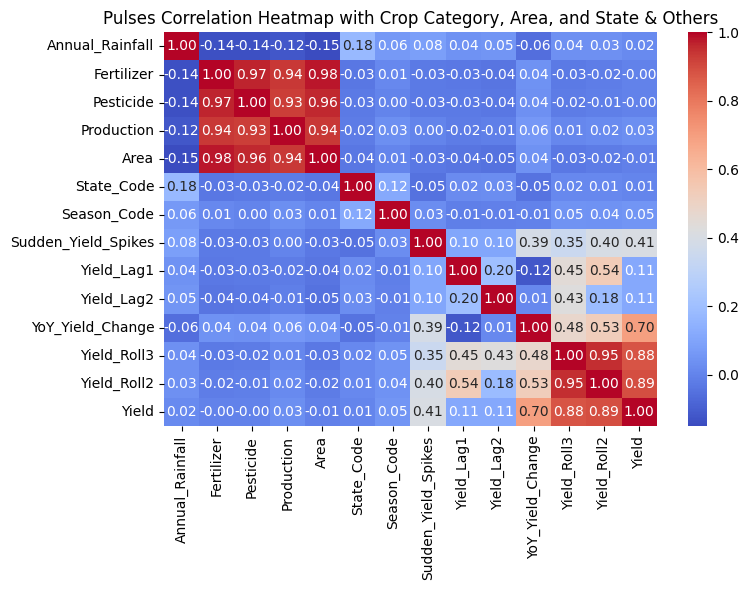

In [93]:
selected_features1 = ['Annual_Rainfall', 'Fertilizer', 'Pesticide',  'Production'  ,'Area','State_Code', 'Season_Code' ,   'Sudden_Yield_Spikes', 'Yield_Lag1',
                       'Yield_Lag2' , 'YoY_Yield_Change', 'Yield_Roll3', 'Yield_Roll2','Yield']
corr = Pulses_df[selected_features1].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pulses Correlation Heatmap with Crop Category, Area, and State & Others')
plt.tight_layout()
plt.show()


## Pulses
### Climatic Factor

##### Annual Rainfall (-0.02) → Very weak and slightly negative correlation, indicating minimal direct climatic influence on yield variation for pulses in the observed data.
##### State (0.01) →  It indicates that states do help in Pulses production mainly due to different variet y of their soil. 
##### Season (0.05) → very small but do contributes in improving Yield as seasons also bring different variations in temperature and other effects

### Input Factors

##### Fertilizer Usage (0.00) → No measurable correlation with yield.

##### Pesticide Usage (-0.00) → Essentially no correlation, possibly due to crop less dependence on pesticides.

##### Cultivated Area (0.01) → Negligible impact on yield.

### Historical & Policy-Linked Factors

##### Production Volume (0.03) → Minimal correlation; yield improvements may not directly linked to production changes.

##### Yield History & Rolling Averages (0.88–0.89) → Strongest positive correlation, confirming that stable past yields and consistent agricultural practices are key drivers for future performance.

##### YoY Yield Change (0.70) → Moderately strong correlation, implying that year-on-year growth patterns are an important predictor of yield trends.

In [94]:

def train_prophet_Pulses(crop_data, changepoint_prior_scale=0.01, seasonality_prior_scale=5.0):
    crop_data = crop_data.copy()
    crop_data.rename(columns={'Yield': 'y'}, inplace=True)

    modelpulses = Prophet(
        yearly_seasonality=True,
        seasonality_prior_scale=seasonality_prior_scale,
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_mode = 'multiplicative'
    )

   
    modelpulses.add_regressor('Annual_Rainfall')
    modelpulses.add_regressor('Production')
    modelpulses.add_regressor('Season_Code')
    modelpulses.add_regressor('State_Code')
    modelpulses.add_regressor('Yield_Lag1')
    modelpulses.add_regressor('Yield_Lag2')
    modelpulses.add_regressor('Sudden_Yield_Spikes')
    modelpulses.add_regressor('YoY_Yield_Change')
    modelpulses.add_regressor('Yield_Roll3')
    modelpulses.add_regressor('Yield_Roll2')
   
    

    modelpulses.fit(crop_data[['ds', 'y',  'Annual_Rainfall', 'Production', 'Season_Code', 'State_Code',  'Yield_Lag1', 'Yield_Lag2',   'Sudden_Yield_Spikes', 'YoY_Yield_Change', 'Yield_Roll3', 'Yield_Roll2']])
    return modelpulses

In [95]:


def evaluate_model(model, initial='5475 days', period='365 days', horizon='365 days'):
    
    cv_results = cross_validation(model, initial=initial, period=period, horizon=horizon, parallel=  'processes')
    
    
    perf = performance_metrics(cv_results, rolling_window=1)
    
   
    avg_rmse = perf['rmse'].mean() if 'rmse' in perf.columns else np.nan
    
   
    if 'mape' in perf.columns:
        avg_mape = perf['mape'].mean()
    else:
        
        mask = cv_results['y'].abs() > 1e-6  # avoiding division by zero
        avg_mape = mean_absolute_percentage_error(cv_results['y'][mask], cv_results['yhat'][mask])
    
    return float(avg_mape*100), float(avg_rmse)





modelpulses = train_prophet_Pulses(Pulses_df)

avg_mape, avg_rmse = evaluate_model(modelpulses)
print(f" Pulses - Avg MAPE: {avg_mape:.4f}, Avg RMSE: {avg_rmse:.4f}")

18:11:04 - cmdstanpy - INFO - Chain [1] start processing
18:11:05 - cmdstanpy - INFO - Chain [1] done processing


 Pulses - Avg MAPE: 3.7124, Avg RMSE: 0.0594


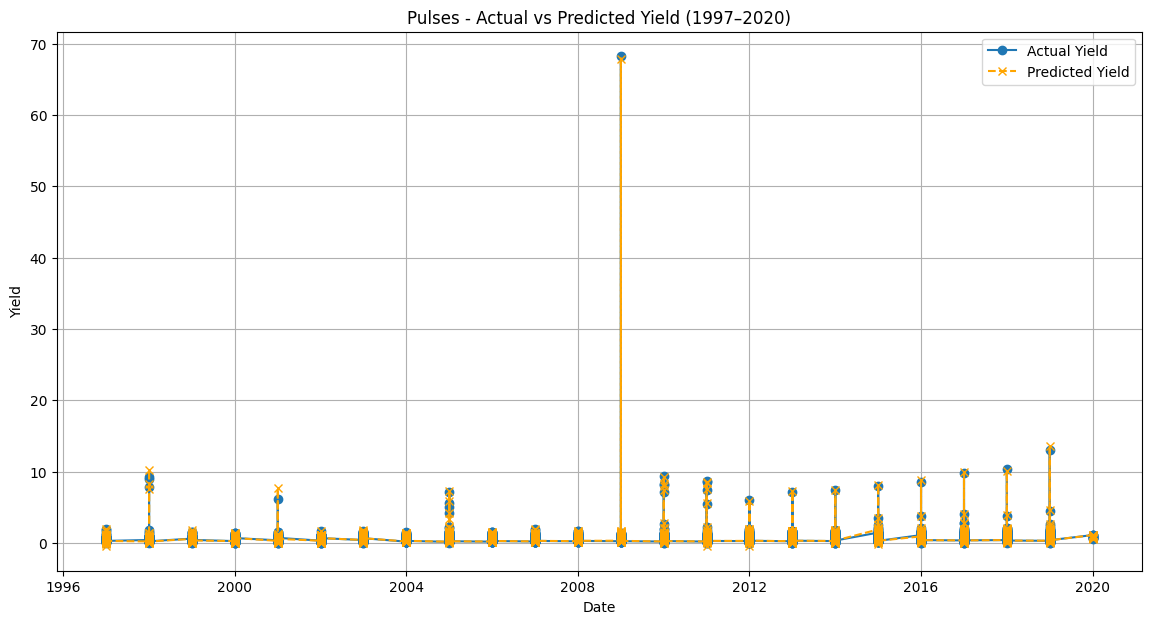

In [96]:
def plot_actual_vs_predicted_points(modelpulses, df_crop, title):
    
    df_sorted = df_crop.sort_values(['Crop_Year', 'Season_Code', 'State_Code']).reset_index(drop=True)

   
    cols_for_pred = ['ds'] + list(modelpulses.extra_regressors.keys())
    forecast = modelpulses.predict(df_sorted[cols_for_pred])

   
    df_sorted['Predicted'] = forecast['yhat'].values

    
    plt.figure(figsize=(14, 7))
    plt.plot(df_sorted['ds'], df_sorted['y'], label='Actual Yield', marker='o', linestyle='-')
    plt.plot(df_sorted['ds'], df_sorted['Predicted'], label='Predicted Yield', marker='x', linestyle='--', color='orange')
    plt.title(f"{title} - Actual vs Predicted Yield (1997–2020)")
    plt.xlabel("Date")
    plt.ylabel("Yield")
    plt.legend()
    plt.grid(True)
    plt.show()


Pulses_df_prophet = Pulses_df.rename(columns={'Yield': 'y'})
plot_actual_vs_predicted_points(modelpulses, Pulses_df_prophet, "Pulses")

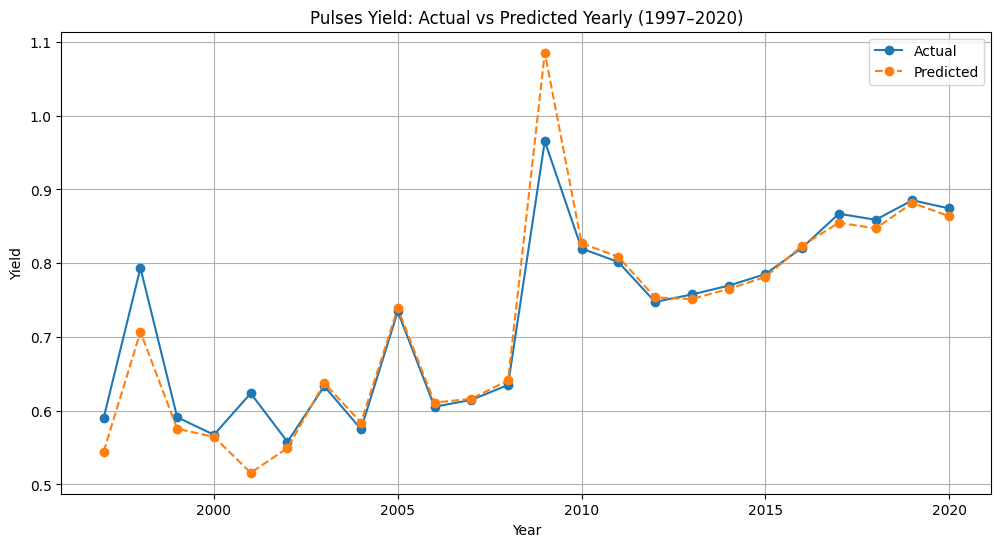

In [97]:
def plot_wheat_actual_vs_predicted(modelpulses, Pulses_df):
    
    Pulses_df_sorted = Pulses_df.sort_values(['Crop_Year', 'Season_Code', 'State_Code']).reset_index(drop=True)

    
    cols_for_pred = ['ds'] + list(modelpulses.extra_regressors.keys())
    forecast = modelpulses.predict(Pulses_df_sorted[cols_for_pred])

    
    Pulses_df_sorted['Predicted'] = forecast['yhat'].values

    
    df_plot = (
        Pulses_df_sorted.groupby(['Crop_Year'], as_index=False)[['Yield', 'Predicted']]
        .mean()
    )

    # 5. Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df_plot['Crop_Year'], df_plot['Yield'], marker='o', label='Actual')
    plt.plot(df_plot['Crop_Year'], df_plot['Predicted'], marker='o', label='Predicted', linestyle='--')
    plt.title("Pulses Yield: Actual vs Predicted Yearly (1997–2020)")
    plt.xlabel("Year")
    plt.ylabel("Yield")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_wheat_actual_vs_predicted(modelpulses, Pulses_df)

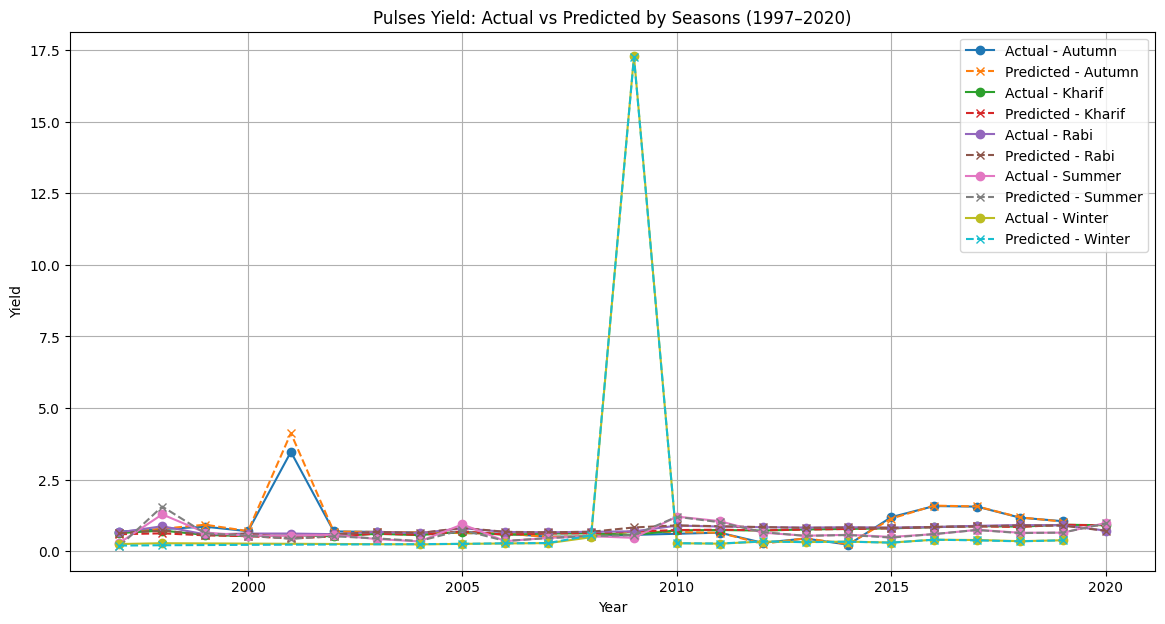

In [98]:
def plot_actual_vs_predicted_seasonwise(modelpulses, df_crop, title):
    
    df_sorted = df_crop.sort_values(['Crop_Year', 'Season_Code', 'State_Code']).reset_index(drop=True)

    
    cols_for_pred = ['ds'] + list(modelpulses.extra_regressors.keys())
    forecast = modelpulses.predict(df_sorted[cols_for_pred])

    
    df_sorted['Predicted'] = forecast['yhat'].values

    
    season_map = {
        1: "Kharif",
        2: "Rabi",
        3: "Summer",
        4: "Autumn",
        5: "Winter",
        6: "Whole Year"
    }
    df_sorted['Season'] = df_sorted['Season_Code'].map(season_map)

    
    df_plot = df_sorted.groupby(['Crop_Year', 'Season'], as_index=False)[['y', 'Predicted']].mean()

   
    plt.figure(figsize=(14, 7))
    for season in df_plot['Season'].unique():
        season_data = df_plot[df_plot['Season'] == season]
        plt.plot(season_data['Crop_Year'], season_data['y'], marker='o', label=f'Actual - {season}')
        plt.plot(season_data['Crop_Year'], season_data['Predicted'], marker='x', linestyle='--', label=f'Predicted - {season}')

    plt.title(f"{title} Yield: Actual vs Predicted by Seasons (1997–2020)")
    plt.xlabel("Year")
    plt.ylabel("Yield")
    plt.legend()
    plt.grid(True)
    plt.show()



Pulses_df_prophet = Pulses_df.rename(columns={'Yield': 'y'})
plot_actual_vs_predicted_seasonwise(modelpulses, Pulses_df_prophet, "Pulses")

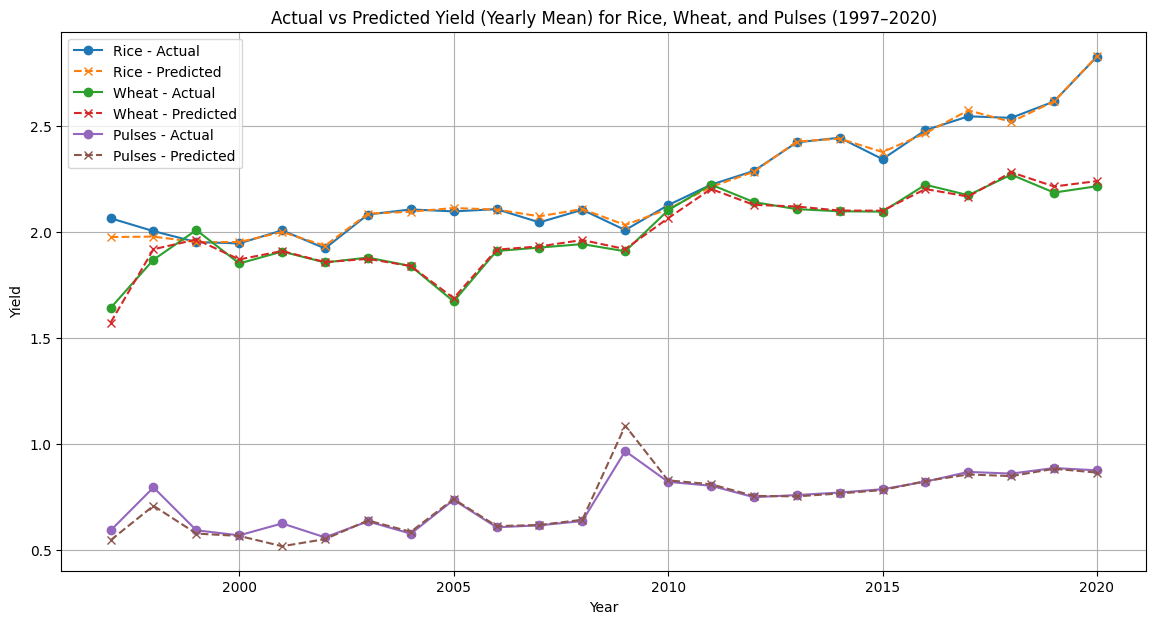

In [99]:
def plot_all_crops_yearly_mean(models_dict, df_dict):
  
    plt.figure(figsize=(14, 7))

    for crop_name in models_dict.keys():
        model = models_dict[crop_name]
        df_crop = df_dict[crop_name].sort_values(['Crop_Year', 'Season_Code', 'State_Code']).reset_index(drop=True)

        
        cols_for_pred = ['ds'] + list(model.extra_regressors.keys())
        forecast = model.predict(df_crop[cols_for_pred])

        
        df_crop['Predicted'] = forecast['yhat'].values

        
        df_yearly = df_crop.groupby('Crop_Year', as_index=False)[['y', 'Predicted']].mean()

        
        plt.plot(df_yearly['Crop_Year'], df_yearly['y'], marker='o', linestyle='-', label=f"{crop_name} - Actual")
        plt.plot(df_yearly['Crop_Year'], df_yearly['Predicted'], marker='x', linestyle='--', label=f"{crop_name} - Predicted")

    plt.title("Actual vs Predicted Yield (Yearly Mean) for Rice, Wheat, and Pulses (1997–2020)")
    plt.xlabel("Year")
    plt.ylabel("Yield")
    plt.legend()
    plt.grid(True)
    plt.show()



models_dict = {
    'Rice': modelrice,
    'Wheat': modelwheat,
    'Pulses': modelpulses
}

df_dict = {
    'Rice': Rice_df.rename(columns={'Yield': 'y'}),
    'Wheat': Wheat_df.rename(columns={'Yield': 'y'}),
    'Pulses': Pulses_df.rename(columns={'Yield': 'y'})
}

plot_all_crops_yearly_mean(models_dict, df_dict)



In [100]:
Pulses_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,...,Season_Code,State_Code,Crop_Cat_Code,Sudden_Yield_Spikes,ds,Yield_Lag1,Yield_Lag2,YoY_Yield_Change,Yield_Roll3,Yield_Roll2
6208,Arhar/Tur,1997,Kharif,Gujarat,395600.0,296200,798.9,37649.2520,122.6360,0.778421,...,1,7,1,0,1997-01-01,0.721725,0.716018,0.263990,0.778421,0.778421
6191,Other Kharif pulses,1997,Kharif,Bihar,15730.0,9337,1303.7,1497.0241,4.8763,0.572830,...,1,3,1,0,1997-01-01,0.721725,0.716018,0.263990,0.572830,0.572830
6238,Arhar/Tur,1997,Kharif,Madhya Pradesh,346900.0,251800,1189.1,33014.4730,107.5390,0.696512,...,1,14,1,0,1997-01-01,0.721725,0.716018,0.263990,0.696512,0.696512
6236,Urad,1997,Kharif,Gujarat,131400.0,83700,798.9,12505.3380,40.7340,0.654706,...,1,7,1,0,1997-01-01,0.778421,0.716018,-0.158931,0.716563,0.716563
6217,Gram,1997,Rabi,Gujarat,123300.0,98700,798.9,11734.4610,38.2230,0.752941,...,2,7,1,0,1997-01-01,0.721725,0.716018,0.263990,0.752941,0.752941


In [101]:
Pulses_df_prophet.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'y', 'Crop_Cat',
       'Season_Code', 'State_Code', 'Crop_Cat_Code', 'Sudden_Yield_Spikes',
       'ds', 'Yield_Lag1', 'Yield_Lag2', 'YoY_Yield_Change', 'Yield_Roll3',
       'Yield_Roll2'],
      dtype='object')

In [102]:
df_final.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Cat,Season_Code,State_Code,Crop_Cat_Code,Sudden_Yield_Spikes,ds
6208,Arhar/Tur,1997,Kharif,Gujarat,395600.0,296200,798.9,37649.25200,122.63600,0.778421,Pulses,1,7,1,0,1997-01-01
6207,Wheat,1997,Rabi,Bihar,2067610.0,4048699,1303.7,196774.44370,640.95910,1.811091,Wheat,2,3,3,0,1997-01-01
6197,Rice,1997,Winter,Bihar,4238204.0,6004120,1303.7,403349.87470,1313.84324,1.354364,Rice,5,3,2,0,1997-01-01
6196,Rice,1997,Summer,Bihar,124429.0,236446,1303.7,11841.90793,38.57299,1.683265,Rice,3,3,2,0,1997-01-01
6195,Rice,1997,Autumn,Bihar,749671.0,892725,1303.7,71346.18907,232.39801,1.102245,Rice,0,3,2,0,1997-01-01


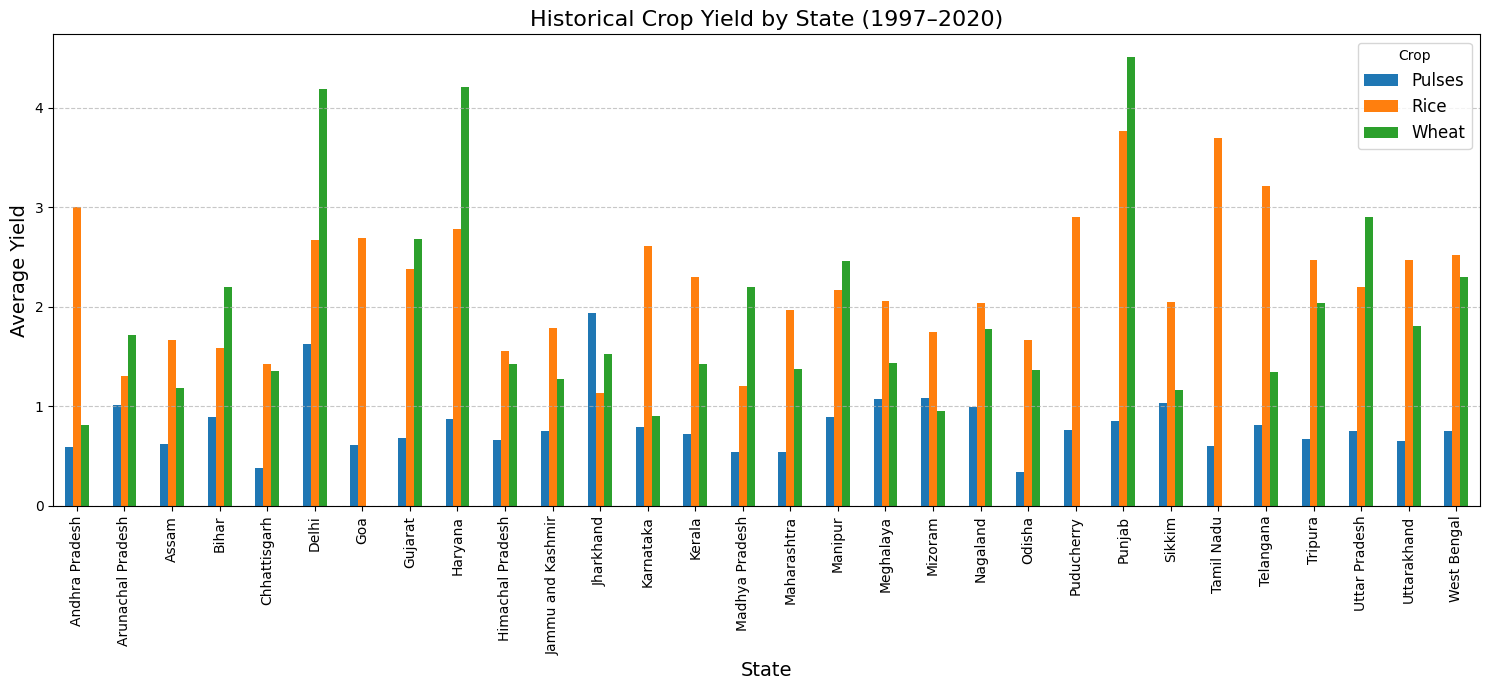

In [103]:

crops_of_interest = ['Rice', 'Wheat', 'Pulses']
df_filtered = df_final[df_final['Crop_Cat'].isin(crops_of_interest)]


state_means = (
    df_filtered
    .groupby(['State', 'Crop_Cat'])['Yield']
    .mean()
    .reset_index()
)


pivot_df = state_means.pivot(index='State', columns='Crop_Cat', values='Yield')


pivot_df.plot(kind='bar', figsize=(15, 7))
plt.title('Historical Crop Yield by State (1997–2020)', fontsize=16)
plt.ylabel('Average Yield', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.legend(title='Crop', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

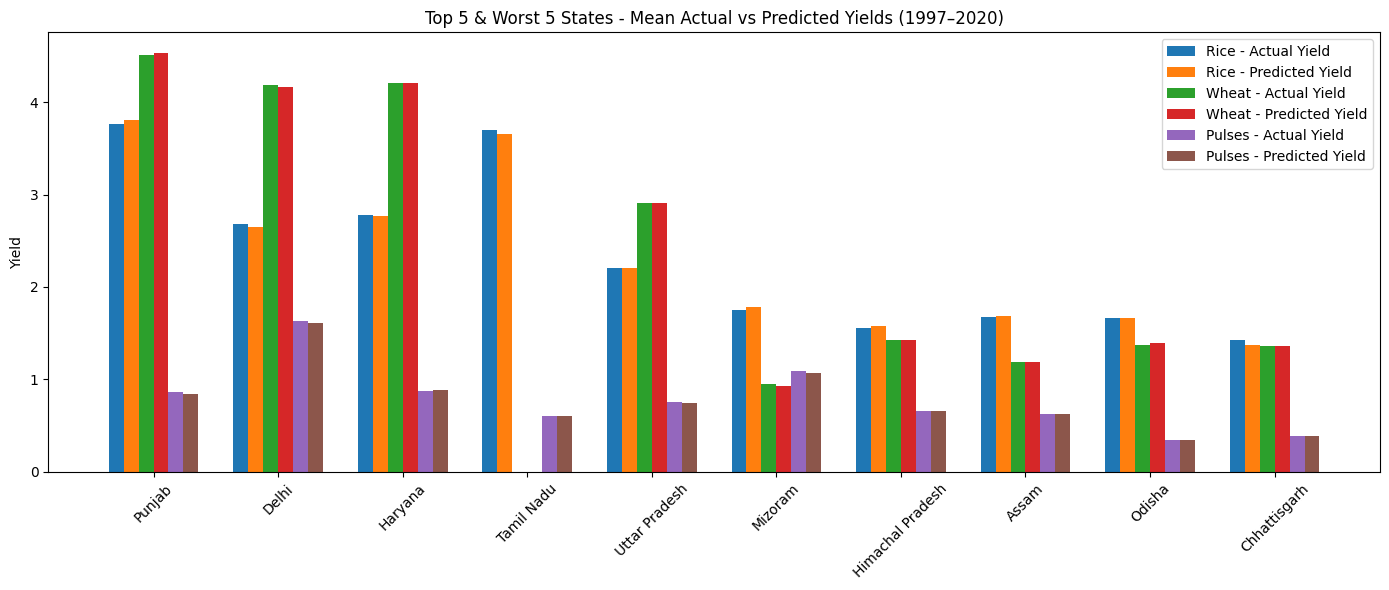

In [104]:
def get_statewise_prediction_comparison(model, df_crop, crop_name, regressor_cols):
    df_sorted = df_crop.sort_values(['ds', 'Season_Code', 'State_Code']).reset_index(drop=True)

    
    forecast = model.predict(df_sorted[['ds'] + regressor_cols])

    
    df_with_preds = df_sorted.copy()
    df_with_preds['Predicted_Yield'] = forecast['yhat'].values

    
    statewise = (
        df_with_preds.groupby('State')[['y', 'Predicted_Yield']]
        .mean()
        .reset_index()
    )
    statewise.rename(columns={'y': 'Actual_Yield'}, inplace=True)
    statewise['Crop'] = crop_name
    return statewise

regressors_rice = ['Production', 'Season_Code', 'State_Code',  'Fertilizer', 'Pesticide' ,
                              'Yield_Lag1', 'Yield_Lag2',   'Sudden_Yield_Spikes', 'YoY_Yield_Change', 'Yield_Roll3', 'Yield_Roll2']

regressors_wheat  = ['Area', 'Production', 'Season_Code', 'State_Code',  'Fertilizer', 'Pesticide' ,
                              'Yield_Lag1', 'Yield_Lag2',   'Sudden_Yield_Spikes', 'YoY_Yield_Change', 'Yield_Roll3', 'Yield_Roll2']

regressors_pulses = ['Annual_Rainfall', 'Production', 'Season_Code', 'State_Code',  'Yield_Lag1', 'Yield_Lag2',   'Sudden_Yield_Spikes', 'YoY_Yield_Change', 'Yield_Roll3', 'Yield_Roll2']


rice_statewise   = get_statewise_prediction_comparison(modelrice,   Rice_df.rename(columns={'Yield': 'y'}),   'Rice',   regressors_rice)
wheat_statewise  = get_statewise_prediction_comparison(modelwheat,  Wheat_df.rename(columns={'Yield': 'y'}),  'Wheat',  regressors_wheat)
pulses_statewise = get_statewise_prediction_comparison(modelpulses, Pulses_df.rename(columns={'Yield': 'y'}), 'Pulses', regressors_pulses)

combined_statewise = pd.concat([rice_statewise, wheat_statewise, pulses_statewise], ignore_index=True)


mean_actual_by_state = (
    combined_statewise.groupby('State')['Actual_Yield']
    .mean()
    .sort_values(ascending=False)
)

top5_states = mean_actual_by_state.head(5).index.tolist()
bottom5_states = mean_actual_by_state.tail(5).index.tolist()
selected_states = top5_states + bottom5_states

plot_df = combined_statewise[combined_statewise['State'].isin(selected_states)]


crops = plot_df['Crop'].unique()
metrics = ['Actual_Yield', 'Predicted_Yield']
bar_width = 0.12


offsets = {}
n_groups = len(crops) * len(metrics)
start_offset = - (n_groups - 1) / 2 * bar_width
count = 0
for crop in crops:
    for metric in metrics:
        offsets[(crop, metric)] = start_offset + count * bar_width
        count += 1

plt.figure(figsize=(14, 6))
x = np.arange(len(selected_states))

for crop in crops:
    for metric in metrics:
        subset = (
            plot_df[plot_df['Crop'] == crop]
            .set_index('State')
            .reindex(selected_states)  
        )
        plt.bar(
            x + offsets[(crop, metric)],
            subset[metric].values,      
            width=bar_width,
            label=f"{crop} - {metric.replace('_', ' ')}"
        )

plt.xticks(x, selected_states, rotation=45)
plt.ylabel("Yield")
plt.title("Top 5 & Worst 5 States - Mean Actual vs Predicted Yields (1997–2020)")
plt.legend()
plt.tight_layout()
plt.show()

In [105]:
combined_statewise = pd.concat(
    [rice_statewise, wheat_statewise, pulses_statewise], 
    ignore_index=True
)


state_means = (
    combined_statewise.groupby('State')[['Actual_Yield', 'Predicted_Yield']]
    .mean()
    .reset_index()
)


state_means_sorted = state_means.sort_values('Predicted_Yield', ascending=False)


top5_states = state_means_sorted.head(5)
bottom5_states = state_means_sorted.tail(5)

# Printing results
print("Top 5 States by Predicted Yield (Mean values):")
print(top5_states)

print("\nBottom 5 States by Predicted Yield (Mean values):")
print(bottom5_states)

Top 5 States by Predicted Yield (Mean values):
            State  Actual_Yield  Predicted_Yield
22         Punjab      3.045287         3.056572
5           Delhi      2.832879         2.809993
8         Haryana      2.620682         2.621628
24     Tamil Nadu      2.151110         2.127485
27  Uttar Pradesh      1.954193         1.951510

Bottom 5 States by Predicted Yield (Mean values):
               State  Actual_Yield  Predicted_Yield
18           Mizoram      1.262866         1.260254
9   Himachal Pradesh      1.213576         1.219190
2              Assam      1.159276         1.163430
20            Odisha      1.124258         1.130991
4       Chhattisgarh      1.056414         1.040789


In [106]:
df_final.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Cat,Season_Code,State_Code,Crop_Cat_Code,Sudden_Yield_Spikes,ds
6208,Arhar/Tur,1997,Kharif,Gujarat,395600.0,296200,798.9,37649.25200,122.63600,0.778421,Pulses,1,7,1,0,1997-01-01
6207,Wheat,1997,Rabi,Bihar,2067610.0,4048699,1303.7,196774.44370,640.95910,1.811091,Wheat,2,3,3,0,1997-01-01
6197,Rice,1997,Winter,Bihar,4238204.0,6004120,1303.7,403349.87470,1313.84324,1.354364,Rice,5,3,2,0,1997-01-01
6196,Rice,1997,Summer,Bihar,124429.0,236446,1303.7,11841.90793,38.57299,1.683265,Rice,3,3,2,0,1997-01-01
6195,Rice,1997,Autumn,Bihar,749671.0,892725,1303.7,71346.18907,232.39801,1.102245,Rice,0,3,2,0,1997-01-01


In [107]:
df_final.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Crop_Cat',
       'Season_Code', 'State_Code', 'Crop_Cat_Code', 'Sudden_Yield_Spikes',
       'ds'],
      dtype='object')

# Crops Data (2010 - 2017)

In [108]:
df_crops = pd.read_csv("Crops_data.csv")


yield_cols = [col for col in df_crops.columns if "YIELD" in col]


df_yield_long = df_crops.melt(
    id_vars=["Year", "State Name", "Dist Name"],
    value_vars=yield_cols,
    var_name="Crop_Column",
    value_name="Yield_Kg_per_ha"
)

In [109]:
df_crops.shape

(2484, 80)

In [110]:
df_crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    2484 non-null   int64  
 1   Year                                         2484 non-null   int64  
 2   State Code                                   2484 non-null   int64  
 3   State Name                                   2484 non-null   object 
 4   Dist Name                                    2484 non-null   object 
 5   RICE AREA (1000 ha)                          2484 non-null   float64
 6   RICE PRODUCTION (1000 tons)                  2484 non-null   float64
 7   RICE YIELD (Kg per ha)                       2484 non-null   float64
 8   WHEAT AREA (1000 ha)                         2484 non-null   float64
 9   WHEAT PRODUCTION (1000 tons)                 2484 non-null   float64
 10  

In [111]:
df_yield_long.head()

,Year,State Name,Dist Name,Crop_Column,Yield_Kg_per_ha
0,2010,Chhattisgarh,Durg,RICE YIELD (Kg per ha),1695.77
1,2011,Chhattisgarh,Durg,RICE YIELD (Kg per ha),1756.23
2,2012,Chhattisgarh,Durg,RICE YIELD (Kg per ha),1900.97
3,2013,Chhattisgarh,Durg,RICE YIELD (Kg per ha),1581.86
4,2014,Chhattisgarh,Durg,RICE YIELD (Kg per ha),1729.89


In [112]:

df_yield_long['Crop'] = df_yield_long['Crop_Column'].str.replace(' YIELD \(Kg per ha\)', '', regex=True)


df_yield_long['Yield'] = df_yield_long['Yield_Kg_per_ha'] / 1000


In [113]:
df_yield_long.head()

,Year,State Name,Dist Name,Crop_Column,Yield_Kg_per_ha,Crop,Yield
0,2010,Chhattisgarh,Durg,RICE YIELD (Kg per ha),1695.77,RICE,1.69577
1,2011,Chhattisgarh,Durg,RICE YIELD (Kg per ha),1756.23,RICE,1.75623
2,2012,Chhattisgarh,Durg,RICE YIELD (Kg per ha),1900.97,RICE,1.90097
3,2013,Chhattisgarh,Durg,RICE YIELD (Kg per ha),1581.86,RICE,1.58186
4,2014,Chhattisgarh,Durg,RICE YIELD (Kg per ha),1729.89,RICE,1.72989


In [114]:
df_yield_long = df_yield_long.drop(columns=['Crop_Column', 'Yield_Kg_per_ha'])

In [115]:
df_yield_long['Crop'] = df_yield_long['Crop'].str.title()

pulses_group = ['Chickpea', 'Pigeonpea', 'Minor Pulses']

df_yield_long['Crop_Cat'] = df_yield_long['Crop']
df_yield_long['Crop_Cat'] = 'Other'
df_yield_long.loc[df_yield_long['Crop'].isin(pulses_group), 'Crop_Cat'] = 'Pulses'

df_yield_long.loc[df_yield_long['Crop'] == 'Wheat', 'Crop_Cat'] = 'Wheat'
df_yield_long.loc[df_yield_long['Crop'] == 'Rice', 'Crop_Cat'] = 'Rice'

In [116]:
df_yield_long['Crop_Cat'].value_counts()

Crop_Cat
Other     44712
Pulses     7452
Wheat      2484
Rice       2484
Name: count, dtype: int64

In [117]:
df_yield_long['Crop'].unique()

array(['Rice', 'Wheat', 'Kharif Sorghum', 'Rabi Sorghum', 'Sorghum',
       'Pearl Millet', 'Maize', 'Finger Millet', 'Barley', 'Chickpea',
       'Pigeonpea', 'Minor Pulses', 'Groundnut', 'Sesamum',
       'Rapeseed And Mustard', 'Safflower', 'Castor', 'Linseed',
       'Sunflower', 'Soyabean', 'Oilseeds', 'Sugarcane', 'Cotton'],
      dtype=object)

In [118]:
area_cols = [col for col in df_crops.columns if 'AREA' in col and '1000' in col]


df_area_long = df_crops.melt(
    id_vars=["Year", "State Name", "Dist Name"],
    value_vars=area_cols,
    var_name="Crop_Column",
    value_name="Area_1000_ha"
)

df_area_long['Crop'] = df_area_long['Crop_Column'].str.replace(' AREA \(1000 ha\)', '', regex=True)
df_area_long['Area'] = df_area_long['Area_1000_ha'] * 1000  


df_area_long = df_area_long.drop(columns=['Crop_Column', 'Area_1000_ha'])

df_yield_long['Crop'] = df_yield_long['Crop'].str.strip().str.title()
df_area_long['Crop'] = df_area_long['Crop'].str.strip().str.title()


In [119]:
production_cols = [col for col in df_crops.columns if 'PRODUCTION' in col and '1000' in col]


df_production_long = df_crops.melt(
    id_vars=["Year", "State Name", "Dist Name"],
    value_vars=production_cols,
    var_name="Crop_Column",
    value_name="Production_1000_tons"
)


df_production_long['Crop'] = df_production_long['Crop_Column'].str.replace(' PRODUCTION \(1000 tons\)', '', regex=True)


df_production_long['Production'] = df_production_long['Production_1000_tons'] * 1000


df_production_long = df_production_long.drop(columns=['Crop_Column', 'Production_1000_tons'])


df_production_long['Crop'] = df_production_long['Crop'].str.strip().str.title()

In [120]:
df_merged = df_yield_long.merge(df_area_long, on=['Year', 'State Name', 'Dist Name', 'Crop'], how='left')
df_merged = df_merged.merge(df_production_long, on=['Year', 'State Name', 'Dist Name', 'Crop'], how='left')


df_merged.rename(columns={
    'Year': 'Crop_Year',
    'State Name': 'State',
    'Dist Name': 'District'
}, inplace=True)

In [121]:
df_merged['Yield'].value_counts()

Yield
0.00000    21937
1.00000     1464
0.50000      481
2.00000      336
1.50000      214
           ...  
1.60317        1
1.98725        1
1.73323        1
2.05580        1
1.43157        1
Name: count, Length: 24550, dtype: int64

In [122]:
df_merged['Production'].value_counts()

Production
0.0         22230
10.0         1098
20.0          652
30.0          526
100.0         439
            ...  
146850.0        1
139890.0        1
12950.0         1
376610.0        1
331330.0        1
Name: count, Length: 11078, dtype: int64

In [123]:
df_merged['Area'].value_counts()

Area
0.0         21578
10.0         1089
20.0          683
100.0         507
30.0          466
            ...  
817680.0        1
834870.0        1
819440.0        1
807070.0        1
806550.0        1
Name: count, Length: 9878, dtype: int64

### Removing all the Zero Value reows from Production, Area, Yield for better Crop Insights Analysis

In [124]:
df_merged = df_merged[
    (df_merged['Area'] != 0) &
    (df_merged['Production'] != 0) &
    (df_merged['Yield'] != 0)
]

In [125]:
df_merged.isnull().sum()

Crop_Year     0
State         0
District      0
Crop          0
Yield         0
Crop_Cat      0
Area          0
Production    0
dtype: int64

In [126]:
df_merged.describe()

,Crop_Year,Yield,Area,Production
count,34733.000000,34733.000000,3.473300e+04,3.473300e+04
mean,2013.441914,1.593760,4.397694e+04,8.475433e+04
std,2.288201,1.674854,9.166927e+04,2.390619e+05
min,2010.000000,0.000280,1.000000e+01,1.000000e+01
25%,2011.000000,0.636950,7.000000e+02,6.100000e+02
50%,2013.000000,1.056510,5.960000e+03,6.200000e+03
75%,2015.000000,1.884730,3.949000e+04,4.588000e+04
max,2017.000000,22.062300,1.154230e+06,4.305500e+06


In [127]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34733 entries, 0 to 56934
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crop_Year   34733 non-null  int64  
 1   State       34733 non-null  object 
 2   District    34733 non-null  object 
 3   Crop        34733 non-null  object 
 4   Yield       34733 non-null  float64
 5   Crop_Cat    34733 non-null  object 
 6   Area        34733 non-null  float64
 7   Production  34733 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.4+ MB


In [128]:
df_merged.to_csv("Cleaned_Crops_data.csv", index=False)